In [1]:
from utils import get_datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
seeds = [42, 27, 14, 924, 80]

In [2]:
window_size = 30
opp_dataset = get_datasets('opportunity', sliding_window=True, validation=True, window_size=window_size, step=10, pretraining=True)

In [3]:
train = opp_dataset['training_set']
print(train.data['inputs'].shape)
print(train.data['inputs'].shape)

(7184, 224, 30)
(7184, 224, 30)


In [4]:
print(train.num_classes)

5


In [ ]:
val = opp_dataset['validation_set']
print(val.data['inputs'].shape)

In [ ]:
test = opp_dataset['testing_set']
print(test.data['inputs'].shape)

In [47]:
ones = np.zeros([10, 113])
result = np.pad(array=ones, pad_width=([(0, 0), (0, 111)]), mode='constant', constant_values=0)
print(result)
print(result.shape)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
(10, 224)


In [29]:
import torchvision.transforms as T

preprocess = T.Compose([
   T.Resize(256),
   T.ToTensor(),
])

j = preprocess(train.data['inputs'])
j.shape

TypeError: img should be PIL Image. Got <class 'numpy.ndarray'>

In [229]:
series = train.data['inputs'][0:10, 0]
print(series.shape)

(10, 224)


<BarContainer object of 5 artists>

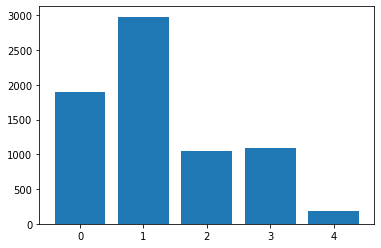

In [8]:
count = np.array(np.unique(train.data['targets'], return_counts=True))
plt.bar(count[0], count[1])

In [200]:
from models import MLPMixer
import torch

# model = MLPMixer.MlpMixer(image_height=113, image_width=window_size,
#                           patch_size=16, token_dim=128, channel_dim=1024,
#                           patch_dim=256, num_classes=train.num_classes(),
#                           num_blocks=12)

model = MLPMixer.MlpMixer(image_height=224, image_width=224,
                          patch_size=16, token_dim=384, channel_dim=3072,
                          patch_dim=768, num_classes=5,
                          num_blocks=12)

model = model.cuda()

In [195]:
path = "../weights/imagenet21k_Mixer-B_16.npz"
npz_arr = np.load(path)
dict = list(npz_arr.keys())
print(len(dict))
print(dict)


150
['MixerBlock_0/LayerNorm_0/bias', 'MixerBlock_0/LayerNorm_0/scale', 'MixerBlock_0/LayerNorm_1/bias', 'MixerBlock_0/LayerNorm_1/scale', 'MixerBlock_0/channel_mixing/Dense_0/bias', 'MixerBlock_0/channel_mixing/Dense_0/kernel', 'MixerBlock_0/channel_mixing/Dense_1/bias', 'MixerBlock_0/channel_mixing/Dense_1/kernel', 'MixerBlock_0/token_mixing/Dense_0/bias', 'MixerBlock_0/token_mixing/Dense_0/kernel', 'MixerBlock_0/token_mixing/Dense_1/bias', 'MixerBlock_0/token_mixing/Dense_1/kernel', 'MixerBlock_1/LayerNorm_0/bias', 'MixerBlock_1/LayerNorm_0/scale', 'MixerBlock_1/LayerNorm_1/bias', 'MixerBlock_1/LayerNorm_1/scale', 'MixerBlock_1/channel_mixing/Dense_0/bias', 'MixerBlock_1/channel_mixing/Dense_0/kernel', 'MixerBlock_1/channel_mixing/Dense_1/bias', 'MixerBlock_1/channel_mixing/Dense_1/kernel', 'MixerBlock_1/token_mixing/Dense_0/bias', 'MixerBlock_1/token_mixing/Dense_0/kernel', 'MixerBlock_1/token_mixing/Dense_1/bias', 'MixerBlock_1/token_mixing/Dense_1/kernel', 'MixerBlock_10/LayerNor

In [196]:
print(npz_arr['MixerBlock_0/channel_mixing/Dense_0/kernel'].shape)

(768, 3072)


In [191]:
import os

TOKEN_FC_0 = "token_mixing/Dense_0/"
TOKEN_FC_1 = "token_mixing/Dense_1/"
CHANNEL_FC_0 = "channel_mixing/Dense_0/"
CHANNEL_FC_1 = "channel_mixing/Dense_1/"
PRE_NORM = "LayerNorm_0/"
POST_NORM = "LayerNorm_1/"


num_block = 0
ROOT = f"MixerBlock_{num_block}/"
z = os.path.join(ROOT, TOKEN_FC_0, "kernel")
print(z)

MixerBlock_0/token_mixing/Dense_0/kernel


In [188]:
print(npz_arr['MixerBlock_0\token_mixing\Dense_0\kernel'].shape)

KeyError: 'MixerBlock_0\token_mixing\\Dense_0\\kernel is not a file in the archive'

In [8]:
for i in dict:
    print(i, npz_arr[i].shape)

MixerBlock_0/LayerNorm_0/bias (768,)
MixerBlock_0/LayerNorm_0/scale (768,)
MixerBlock_0/LayerNorm_1/bias (768,)
MixerBlock_0/LayerNorm_1/scale (768,)
MixerBlock_0/channel_mixing/Dense_0/bias (3072,)
MixerBlock_0/channel_mixing/Dense_0/kernel (768, 3072)
MixerBlock_0/channel_mixing/Dense_1/bias (768,)
MixerBlock_0/channel_mixing/Dense_1/kernel (3072, 768)
MixerBlock_0/token_mixing/Dense_0/bias (384,)
MixerBlock_0/token_mixing/Dense_0/kernel (196, 384)
MixerBlock_0/token_mixing/Dense_1/bias (196,)
MixerBlock_0/token_mixing/Dense_1/kernel (384, 196)
MixerBlock_1/LayerNorm_0/bias (768,)
MixerBlock_1/LayerNorm_0/scale (768,)
MixerBlock_1/LayerNorm_1/bias (768,)
MixerBlock_1/LayerNorm_1/scale (768,)
MixerBlock_1/channel_mixing/Dense_0/bias (3072,)
MixerBlock_1/channel_mixing/Dense_0/kernel (768, 3072)
MixerBlock_1/channel_mixing/Dense_1/bias (768,)
MixerBlock_1/channel_mixing/Dense_1/kernel (3072, 768)
MixerBlock_1/token_mixing/Dense_0/bias (384,)
MixerBlock_1/token_mixing/Dense_0/kernel (19

In [197]:
np_dict = {
    'patch_embedding.weight' : torch.from_numpy(npz_arr['stem/kernel']).transpose(0,3).transpose(1,2),
    'patch_embedding.bias' : torch.from_numpy(npz_arr['stem/bias']),

    'MixerBlock.0.LayerNorm_0.weight' : torch.from_numpy(npz_arr['MixerBlock_0/LayerNorm_0/scale']),
    'MixerBlock.0.LayerNorm_0.bias' : torch.from_numpy(npz_arr['MixerBlock_0/LayerNorm_0/bias']),
    'MixerBlock.0.LayerNorm_1.weight' : torch.from_numpy(npz_arr['MixerBlock_0/LayerNorm_1/scale']),
    'MixerBlock.0.LayerNorm_1.bias' : torch.from_numpy(npz_arr['MixerBlock_0/LayerNorm_1/bias']),
    'MixerBlock.0.token_mixing.Dense_0.weight' : torch.from_numpy(npz_arr['MixerBlock_0/token_mixing/Dense_0/kernel'].T),
    'MixerBlock.0.token_mixing.Dense_0.bias' : torch.from_numpy(npz_arr['MixerBlock_0/token_mixing/Dense_0/bias']),
    'MixerBlock.0.token_mixing.Dense_1.weight' : torch.from_numpy(npz_arr['MixerBlock_0/token_mixing/Dense_1/kernel'].T),
    'MixerBlock.0.token_mixing.Dense_1.bias' : torch.from_numpy(npz_arr['MixerBlock_0/token_mixing/Dense_1/bias']),
    'MixerBlock.0.channel_mixing.Dense_0.weight' : torch.from_numpy(npz_arr['MixerBlock_0/channel_mixing/Dense_0/kernel'].T),
    'MixerBlock.0.channel_mixing.Dense_0.bias' : torch.from_numpy(npz_arr['MixerBlock_0/channel_mixing/Dense_0/bias']),
    'MixerBlock.0.channel_mixing.Dense_1.weight' : torch.from_numpy(npz_arr['MixerBlock_0/channel_mixing/Dense_1/kernel'].T),
    'MixerBlock.0.channel_mixing.Dense_1.bias' : torch.from_numpy(npz_arr['MixerBlock_0/channel_mixing/Dense_1/bias']),

    'MixerBlock.1.LayerNorm_0.weight' : torch.from_numpy(npz_arr['MixerBlock_1/LayerNorm_0/scale']),
    'MixerBlock.1.LayerNorm_0.bias' : torch.from_numpy(npz_arr['MixerBlock_1/LayerNorm_0/bias']),
    'MixerBlock.1.LayerNorm_1.weight' : torch.from_numpy(npz_arr['MixerBlock_1/LayerNorm_1/scale']),
    'MixerBlock.1.LayerNorm_1.bias' : torch.from_numpy(npz_arr['MixerBlock_1/LayerNorm_1/bias']),
    'MixerBlock.1.token_mixing.Dense_0.weight' : torch.from_numpy(npz_arr['MixerBlock_1/token_mixing/Dense_0/kernel'].T),
    'MixerBlock.1.token_mixing.Dense_0.bias' : torch.from_numpy(npz_arr['MixerBlock_1/token_mixing/Dense_0/bias']),
    'MixerBlock.1.token_mixing.Dense_1.weight' : torch.from_numpy(npz_arr['MixerBlock_1/token_mixing/Dense_1/kernel'].T),
    'MixerBlock.1.token_mixing.Dense_1.bias' : torch.from_numpy(npz_arr['MixerBlock_1/token_mixing/Dense_1/bias']),
    'MixerBlock.1.channel_mixing.Dense_0.weight' : torch.from_numpy(npz_arr['MixerBlock_1/channel_mixing/Dense_0/kernel'].T),
    'MixerBlock.1.channel_mixing.Dense_0.bias' : torch.from_numpy(npz_arr['MixerBlock_1/channel_mixing/Dense_0/bias']),
    'MixerBlock.1.channel_mixing.Dense_1.weight' : torch.from_numpy(npz_arr['MixerBlock_1/channel_mixing/Dense_1/kernel'].T),
    'MixerBlock.1.channel_mixing.Dense_1.bias' : torch.from_numpy(npz_arr['MixerBlock_1/channel_mixing/Dense_1/bias']),
    
    'MixerBlock.2.LayerNorm_0.weight' : torch.from_numpy(npz_arr['MixerBlock_2/LayerNorm_0/scale']),
    'MixerBlock.2.LayerNorm_0.bias' : torch.from_numpy(npz_arr['MixerBlock_2/LayerNorm_0/bias']),
    'MixerBlock.2.LayerNorm_1.weight' : torch.from_numpy(npz_arr['MixerBlock_2/LayerNorm_1/scale']),
    'MixerBlock.2.LayerNorm_1.bias' : torch.from_numpy(npz_arr['MixerBlock_2/LayerNorm_1/bias']),
    'MixerBlock.2.token_mixing.Dense_0.weight' : torch.from_numpy(npz_arr['MixerBlock_2/token_mixing/Dense_0/kernel'].T),
    'MixerBlock.2.token_mixing.Dense_0.bias' : torch.from_numpy(npz_arr['MixerBlock_2/token_mixing/Dense_0/bias']),
    'MixerBlock.2.token_mixing.Dense_1.weight' : torch.from_numpy(npz_arr['MixerBlock_2/token_mixing/Dense_1/kernel'].T),
    'MixerBlock.2.token_mixing.Dense_1.bias' : torch.from_numpy(npz_arr['MixerBlock_2/token_mixing/Dense_1/bias']),
    'MixerBlock.2.channel_mixing.Dense_0.weight' : torch.from_numpy(npz_arr['MixerBlock_2/channel_mixing/Dense_0/kernel'].T),
    'MixerBlock.2.channel_mixing.Dense_0.bias' : torch.from_numpy(npz_arr['MixerBlock_2/channel_mixing/Dense_0/bias']),
    'MixerBlock.2.channel_mixing.Dense_1.weight' : torch.from_numpy(npz_arr['MixerBlock_2/channel_mixing/Dense_1/kernel'].T),
    'MixerBlock.2.channel_mixing.Dense_1.bias' : torch.from_numpy(npz_arr['MixerBlock_2/channel_mixing/Dense_1/bias']),
    
    'MixerBlock.3.LayerNorm_0.weight' : torch.from_numpy(npz_arr['MixerBlock_3/LayerNorm_0/scale']),
    'MixerBlock.3.LayerNorm_0.bias' : torch.from_numpy(npz_arr['MixerBlock_3/LayerNorm_0/bias']),
    'MixerBlock.3.LayerNorm_1.weight' : torch.from_numpy(npz_arr['MixerBlock_3/LayerNorm_1/scale']),
    'MixerBlock.3.LayerNorm_1.bias' : torch.from_numpy(npz_arr['MixerBlock_3/LayerNorm_1/bias']),
    'MixerBlock.3.token_mixing.Dense_0.weight' : torch.from_numpy(npz_arr['MixerBlock_3/token_mixing/Dense_0/kernel'].T),
    'MixerBlock.3.token_mixing.Dense_0.bias' : torch.from_numpy(npz_arr['MixerBlock_3/token_mixing/Dense_0/bias']),
    'MixerBlock.3.token_mixing.Dense_1.weight' : torch.from_numpy(npz_arr['MixerBlock_3/token_mixing/Dense_1/kernel'].T),
    'MixerBlock.3.token_mixing.Dense_1.bias' : torch.from_numpy(npz_arr['MixerBlock_3/token_mixing/Dense_1/bias']),
    'MixerBlock.3.channel_mixing.Dense_0.weight' : torch.from_numpy(npz_arr['MixerBlock_3/channel_mixing/Dense_0/kernel'].T),
    'MixerBlock.3.channel_mixing.Dense_0.bias' : torch.from_numpy(npz_arr['MixerBlock_3/channel_mixing/Dense_0/bias']),
    'MixerBlock.3.channel_mixing.Dense_1.weight' : torch.from_numpy(npz_arr['MixerBlock_3/channel_mixing/Dense_1/kernel'].T),
    'MixerBlock.3.channel_mixing.Dense_1.bias' : torch.from_numpy(npz_arr['MixerBlock_3/channel_mixing/Dense_1/bias']),
    
    'MixerBlock.4.LayerNorm_0.weight' : torch.from_numpy(npz_arr['MixerBlock_4/LayerNorm_0/scale']),
    'MixerBlock.4.LayerNorm_0.bias' : torch.from_numpy(npz_arr['MixerBlock_4/LayerNorm_0/bias']),
    'MixerBlock.4.LayerNorm_1.weight' : torch.from_numpy(npz_arr['MixerBlock_4/LayerNorm_1/scale']),
    'MixerBlock.4.LayerNorm_1.bias' : torch.from_numpy(npz_arr['MixerBlock_4/LayerNorm_1/bias']),
    'MixerBlock.4.token_mixing.Dense_0.weight' : torch.from_numpy(npz_arr['MixerBlock_4/token_mixing/Dense_0/kernel'].T),
    'MixerBlock.4.token_mixing.Dense_0.bias' : torch.from_numpy(npz_arr['MixerBlock_4/token_mixing/Dense_0/bias']),
    'MixerBlock.4.token_mixing.Dense_1.weight' : torch.from_numpy(npz_arr['MixerBlock_4/token_mixing/Dense_1/kernel'].T),
    'MixerBlock.4.token_mixing.Dense_1.bias' : torch.from_numpy(npz_arr['MixerBlock_4/token_mixing/Dense_1/bias']),
    'MixerBlock.4.channel_mixing.Dense_0.weight' : torch.from_numpy(npz_arr['MixerBlock_4/channel_mixing/Dense_0/kernel'].T),
    'MixerBlock.4.channel_mixing.Dense_0.bias' : torch.from_numpy(npz_arr['MixerBlock_4/channel_mixing/Dense_0/bias']),
    'MixerBlock.4.channel_mixing.Dense_1.weight' : torch.from_numpy(npz_arr['MixerBlock_4/channel_mixing/Dense_1/kernel'].T),
    'MixerBlock.4.channel_mixing.Dense_1.bias' : torch.from_numpy(npz_arr['MixerBlock_4/channel_mixing/Dense_1/bias']),
    
    'MixerBlock.5.LayerNorm_0.weight' : torch.from_numpy(npz_arr['MixerBlock_5/LayerNorm_0/scale']),
    'MixerBlock.5.LayerNorm_0.bias' : torch.from_numpy(npz_arr['MixerBlock_5/LayerNorm_0/bias']),
    'MixerBlock.5.LayerNorm_1.weight' : torch.from_numpy(npz_arr['MixerBlock_5/LayerNorm_1/scale']),
    'MixerBlock.5.LayerNorm_1.bias' : torch.from_numpy(npz_arr['MixerBlock_5/LayerNorm_1/bias']),
    'MixerBlock.5.token_mixing.Dense_0.weight' : torch.from_numpy(npz_arr['MixerBlock_5/token_mixing/Dense_0/kernel'].T),
    'MixerBlock.5.token_mixing.Dense_0.bias' : torch.from_numpy(npz_arr['MixerBlock_5/token_mixing/Dense_0/bias']),
    'MixerBlock.5.token_mixing.Dense_1.weight' : torch.from_numpy(npz_arr['MixerBlock_5/token_mixing/Dense_1/kernel'].T),
    'MixerBlock.5.token_mixing.Dense_1.bias' : torch.from_numpy(npz_arr['MixerBlock_5/token_mixing/Dense_1/bias']),
    'MixerBlock.5.channel_mixing.Dense_0.weight' : torch.from_numpy(npz_arr['MixerBlock_5/channel_mixing/Dense_0/kernel'].T),
    'MixerBlock.5.channel_mixing.Dense_0.bias' : torch.from_numpy(npz_arr['MixerBlock_5/channel_mixing/Dense_0/bias']),
    'MixerBlock.5.channel_mixing.Dense_1.weight' : torch.from_numpy(npz_arr['MixerBlock_5/channel_mixing/Dense_1/kernel'].T),
    'MixerBlock.5.channel_mixing.Dense_1.bias' : torch.from_numpy(npz_arr['MixerBlock_5/channel_mixing/Dense_1/bias']),
    
    'MixerBlock.6.LayerNorm_0.weight' : torch.from_numpy(npz_arr['MixerBlock_6/LayerNorm_0/scale']),
    'MixerBlock.6.LayerNorm_0.bias' : torch.from_numpy(npz_arr['MixerBlock_6/LayerNorm_0/bias']),
    'MixerBlock.6.LayerNorm_1.weight' : torch.from_numpy(npz_arr['MixerBlock_6/LayerNorm_1/scale']),
    'MixerBlock.6.LayerNorm_1.bias' : torch.from_numpy(npz_arr['MixerBlock_6/LayerNorm_1/bias']),
    'MixerBlock.6.token_mixing.Dense_0.weight' : torch.from_numpy(npz_arr['MixerBlock_6/token_mixing/Dense_0/kernel'].T),
    'MixerBlock.6.token_mixing.Dense_0.bias' : torch.from_numpy(npz_arr['MixerBlock_6/token_mixing/Dense_0/bias']),
    'MixerBlock.6.token_mixing.Dense_1.weight' : torch.from_numpy(npz_arr['MixerBlock_6/token_mixing/Dense_1/kernel'].T),
    'MixerBlock.6.token_mixing.Dense_1.bias' : torch.from_numpy(npz_arr['MixerBlock_6/token_mixing/Dense_1/bias']),
    'MixerBlock.6.channel_mixing.Dense_0.weight' : torch.from_numpy(npz_arr['MixerBlock_6/channel_mixing/Dense_0/kernel'].T),
    'MixerBlock.6.channel_mixing.Dense_0.bias' : torch.from_numpy(npz_arr['MixerBlock_6/channel_mixing/Dense_0/bias']),
    'MixerBlock.6.channel_mixing.Dense_1.weight' : torch.from_numpy(npz_arr['MixerBlock_6/channel_mixing/Dense_1/kernel'].T),
    'MixerBlock.6.channel_mixing.Dense_1.bias' : torch.from_numpy(npz_arr['MixerBlock_6/channel_mixing/Dense_1/bias']),
    
    'MixerBlock.7.LayerNorm_0.weight' : torch.from_numpy(npz_arr['MixerBlock_7/LayerNorm_0/scale']),
    'MixerBlock.7.LayerNorm_0.bias' : torch.from_numpy(npz_arr['MixerBlock_7/LayerNorm_0/bias']),
    'MixerBlock.7.LayerNorm_1.weight' : torch.from_numpy(npz_arr['MixerBlock_7/LayerNorm_1/scale']),
    'MixerBlock.7.LayerNorm_1.bias' : torch.from_numpy(npz_arr['MixerBlock_7/LayerNorm_1/bias']),
    'MixerBlock.7.token_mixing.Dense_0.weight' : torch.from_numpy(npz_arr['MixerBlock_7/token_mixing/Dense_0/kernel'].T),
    'MixerBlock.7.token_mixing.Dense_0.bias' : torch.from_numpy(npz_arr['MixerBlock_7/token_mixing/Dense_0/bias']),
    'MixerBlock.7.token_mixing.Dense_1.weight' : torch.from_numpy(npz_arr['MixerBlock_7/token_mixing/Dense_1/kernel'].T),
    'MixerBlock.7.token_mixing.Dense_1.bias' : torch.from_numpy(npz_arr['MixerBlock_7/token_mixing/Dense_1/bias']),
    'MixerBlock.7.channel_mixing.Dense_0.weight' : torch.from_numpy(npz_arr['MixerBlock_7/channel_mixing/Dense_0/kernel'].T),
    'MixerBlock.7.channel_mixing.Dense_0.bias' : torch.from_numpy(npz_arr['MixerBlock_7/channel_mixing/Dense_0/bias']),
    'MixerBlock.7.channel_mixing.Dense_1.weight' : torch.from_numpy(npz_arr['MixerBlock_7/channel_mixing/Dense_1/kernel'].T),
    'MixerBlock.7.channel_mixing.Dense_1.bias' : torch.from_numpy(npz_arr['MixerBlock_7/channel_mixing/Dense_1/bias']),
    
    'MixerBlock.8.LayerNorm_0.weight' : torch.from_numpy(npz_arr['MixerBlock_8/LayerNorm_0/scale']),
    'MixerBlock.8.LayerNorm_0.bias' : torch.from_numpy(npz_arr['MixerBlock_8/LayerNorm_0/bias']),
    'MixerBlock.8.LayerNorm_1.weight' : torch.from_numpy(npz_arr['MixerBlock_8/LayerNorm_1/scale']),
    'MixerBlock.8.LayerNorm_1.bias' : torch.from_numpy(npz_arr['MixerBlock_8/LayerNorm_1/bias']),
    'MixerBlock.8.token_mixing.Dense_0.weight' : torch.from_numpy(npz_arr['MixerBlock_8/token_mixing/Dense_0/kernel'].T),
    'MixerBlock.8.token_mixing.Dense_0.bias' : torch.from_numpy(npz_arr['MixerBlock_8/token_mixing/Dense_0/bias']),
    'MixerBlock.8.token_mixing.Dense_1.weight' : torch.from_numpy(npz_arr['MixerBlock_8/token_mixing/Dense_1/kernel'].T),
    'MixerBlock.8.token_mixing.Dense_1.bias' : torch.from_numpy(npz_arr['MixerBlock_8/token_mixing/Dense_1/bias']),
    'MixerBlock.8.channel_mixing.Dense_0.weight' : torch.from_numpy(npz_arr['MixerBlock_8/channel_mixing/Dense_0/kernel'].T),
    'MixerBlock.8.channel_mixing.Dense_0.bias' : torch.from_numpy(npz_arr['MixerBlock_8/channel_mixing/Dense_0/bias']),
    'MixerBlock.8.channel_mixing.Dense_1.weight' : torch.from_numpy(npz_arr['MixerBlock_8/channel_mixing/Dense_1/kernel'].T),
    'MixerBlock.8.channel_mixing.Dense_1.bias' : torch.from_numpy(npz_arr['MixerBlock_8/channel_mixing/Dense_1/bias']),
    
    'MixerBlock.9.LayerNorm_0.weight' : torch.from_numpy(npz_arr['MixerBlock_9/LayerNorm_0/scale']),
    'MixerBlock.9.LayerNorm_0.bias' : torch.from_numpy(npz_arr['MixerBlock_9/LayerNorm_0/bias']),
    'MixerBlock.9.LayerNorm_1.weight' : torch.from_numpy(npz_arr['MixerBlock_9/LayerNorm_1/scale']),
    'MixerBlock.9.LayerNorm_1.bias' : torch.from_numpy(npz_arr['MixerBlock_9/LayerNorm_1/bias']),
    'MixerBlock.9.token_mixing.Dense_0.weight' : torch.from_numpy(npz_arr['MixerBlock_9/token_mixing/Dense_0/kernel'].T),
    'MixerBlock.9.token_mixing.Dense_0.bias' : torch.from_numpy(npz_arr['MixerBlock_9/token_mixing/Dense_0/bias']),
    'MixerBlock.9.token_mixing.Dense_1.weight' : torch.from_numpy(npz_arr['MixerBlock_9/token_mixing/Dense_1/kernel'].T),
    'MixerBlock.9.token_mixing.Dense_1.bias' : torch.from_numpy(npz_arr['MixerBlock_9/token_mixing/Dense_1/bias']),
    'MixerBlock.9.channel_mixing.Dense_0.weight' : torch.from_numpy(npz_arr['MixerBlock_9/channel_mixing/Dense_0/kernel'].T),
    'MixerBlock.9.channel_mixing.Dense_0.bias' : torch.from_numpy(npz_arr['MixerBlock_9/channel_mixing/Dense_0/bias']),
    'MixerBlock.9.channel_mixing.Dense_1.weight' : torch.from_numpy(npz_arr['MixerBlock_9/channel_mixing/Dense_1/kernel'].T),
    'MixerBlock.9.channel_mixing.Dense_1.bias' : torch.from_numpy(npz_arr['MixerBlock_9/channel_mixing/Dense_1/bias']),
    
    'MixerBlock.10.LayerNorm_0.weight' : torch.from_numpy(npz_arr['MixerBlock_10/LayerNorm_0/scale']),
    'MixerBlock.10.LayerNorm_0.bias' : torch.from_numpy(npz_arr['MixerBlock_10/LayerNorm_0/bias']),
    'MixerBlock.10.LayerNorm_1.weight' : torch.from_numpy(npz_arr['MixerBlock_10/LayerNorm_1/scale']),
    'MixerBlock.10.LayerNorm_1.bias' : torch.from_numpy(npz_arr['MixerBlock_10/LayerNorm_1/bias']),
    'MixerBlock.10.token_mixing.Dense_0.weight' : torch.from_numpy(npz_arr['MixerBlock_10/token_mixing/Dense_0/kernel'].T),
    'MixerBlock.10.token_mixing.Dense_0.bias' : torch.from_numpy(npz_arr['MixerBlock_10/token_mixing/Dense_0/bias']),
    'MixerBlock.10.token_mixing.Dense_1.weight' : torch.from_numpy(npz_arr['MixerBlock_10/token_mixing/Dense_1/kernel'].T),
    'MixerBlock.10.token_mixing.Dense_1.bias' : torch.from_numpy(npz_arr['MixerBlock_10/token_mixing/Dense_1/bias']),
    'MixerBlock.10.channel_mixing.Dense_0.weight' : torch.from_numpy(npz_arr['MixerBlock_10/channel_mixing/Dense_0/kernel'].T),
    'MixerBlock.10.channel_mixing.Dense_0.bias' : torch.from_numpy(npz_arr['MixerBlock_10/channel_mixing/Dense_0/bias']),
    'MixerBlock.10.channel_mixing.Dense_1.weight' : torch.from_numpy(npz_arr['MixerBlock_10/channel_mixing/Dense_1/kernel'].T),
    'MixerBlock.10.channel_mixing.Dense_1.bias' : torch.from_numpy(npz_arr['MixerBlock_10/channel_mixing/Dense_1/bias']),
    
    'MixerBlock.11.LayerNorm_0.weight' : torch.from_numpy(npz_arr['MixerBlock_11/LayerNorm_0/scale']),
    'MixerBlock.11.LayerNorm_0.bias' : torch.from_numpy(npz_arr['MixerBlock_11/LayerNorm_0/bias']),
    'MixerBlock.11.LayerNorm_1.weight' : torch.from_numpy(npz_arr['MixerBlock_11/LayerNorm_1/scale']),
    'MixerBlock.11.LayerNorm_1.bias' : torch.from_numpy(npz_arr['MixerBlock_11/LayerNorm_1/bias']),
    'MixerBlock.11.token_mixing.Dense_0.weight' : torch.from_numpy(npz_arr['MixerBlock_11/token_mixing/Dense_0/kernel'].T),
    'MixerBlock.11.token_mixing.Dense_0.bias' : torch.from_numpy(npz_arr['MixerBlock_11/token_mixing/Dense_0/bias']),
    'MixerBlock.11.token_mixing.Dense_1.weight' : torch.from_numpy(npz_arr['MixerBlock_11/token_mixing/Dense_1/kernel'].T),
    'MixerBlock.11.token_mixing.Dense_1.bias' : torch.from_numpy(npz_arr['MixerBlock_11/token_mixing/Dense_1/bias']),
    'MixerBlock.11.channel_mixing.Dense_0.weight' : torch.from_numpy(npz_arr['MixerBlock_11/channel_mixing/Dense_0/kernel'].T),
    'MixerBlock.11.channel_mixing.Dense_0.bias' : torch.from_numpy(npz_arr['MixerBlock_11/channel_mixing/Dense_0/bias']),
    'MixerBlock.11.channel_mixing.Dense_1.weight' : torch.from_numpy(npz_arr['MixerBlock_11/channel_mixing/Dense_1/kernel'].T),
    'MixerBlock.11.channel_mixing.Dense_1.bias' : torch.from_numpy(npz_arr['MixerBlock_11/channel_mixing/Dense_1/bias']),

    'head_norm.weight' : torch.from_numpy(npz_arr['pre_head_layer_norm/scale']),
    'head_norm.bias' : torch.from_numpy(npz_arr['pre_head_layer_norm/bias']),

    'classifer_head.weight' : torch.rand([5, 768]),
    'classifer_head.bias': torch.rand([5])
}

In [12]:
print(len(np_dict))

150


In [14]:
print(np_dict.keys())

dict_keys(['patch_embedding.weight', 'patch_embedding.bias', 'MixerBlock.0.LayerNorm_0.weight', 'MixerBlock.0.LayerNorm_0.bias ', 'MixerBlock.0.LayerNorm_1.weight', 'MixerBlock.0.LayerNorm_1.bias', 'MixerBlock.0.token_mixing.Dense_0.weight', 'MixerBlock.0.token_mixing.Dense_0.bias', 'MixerBlock.0.token_mixing.Dense_1.weight', 'MixerBlock.0.token_mixing.Dense_1.bias', 'MixerBlock.0.channel_mixing.Dense_0.weight', 'MixerBlock.0.channel_mixing.Dense_0.bias', 'MixerBlock.0.channel_mixing.Dense_1.weight', 'MixerBlock.0.channel_mixing.Dense_1.bias', 'MixerBlock.1.LayerNorm_0.weight', 'MixerBlock.1.LayerNorm_0.bias ', 'MixerBlock.1.LayerNorm_1.weight', 'MixerBlock.1.LayerNorm_1.bias', 'MixerBlock.1.token_mixing.Dense_0.weight', 'MixerBlock.1.token_mixing.Dense_0.bias', 'MixerBlock.1.token_mixing.Dense_1.weight', 'MixerBlock.1.token_mixing.Dense_1.bias', 'MixerBlock.1.channel_mixing.Dense_0.weight', 'MixerBlock.1.channel_mixing.Dense_0.bias', 'MixerBlock.1.channel_mixing.Dense_1.weight', 'Mixe

In [198]:
model.load_state_dict(np_dict)

RuntimeError: Error(s) in loading state_dict for MlpMixer:
	size mismatch for patch_embedding.weight: copying a param with shape torch.Size([768, 3, 16, 16]) from checkpoint, the shape in current model is torch.Size([768, 1, 16, 16]).
	size mismatch for MixerBlock.0.token_mixing.Dense_0.weight: copying a param with shape torch.Size([384, 196]) from checkpoint, the shape in current model is torch.Size([384, 15]).
	size mismatch for MixerBlock.0.token_mixing.Dense_1.weight: copying a param with shape torch.Size([196, 384]) from checkpoint, the shape in current model is torch.Size([15, 384]).
	size mismatch for MixerBlock.0.token_mixing.Dense_1.bias: copying a param with shape torch.Size([196]) from checkpoint, the shape in current model is torch.Size([15]).
	size mismatch for MixerBlock.1.token_mixing.Dense_0.weight: copying a param with shape torch.Size([384, 196]) from checkpoint, the shape in current model is torch.Size([384, 15]).
	size mismatch for MixerBlock.1.token_mixing.Dense_1.weight: copying a param with shape torch.Size([196, 384]) from checkpoint, the shape in current model is torch.Size([15, 384]).
	size mismatch for MixerBlock.1.token_mixing.Dense_1.bias: copying a param with shape torch.Size([196]) from checkpoint, the shape in current model is torch.Size([15]).
	size mismatch for MixerBlock.2.token_mixing.Dense_0.weight: copying a param with shape torch.Size([384, 196]) from checkpoint, the shape in current model is torch.Size([384, 15]).
	size mismatch for MixerBlock.2.token_mixing.Dense_1.weight: copying a param with shape torch.Size([196, 384]) from checkpoint, the shape in current model is torch.Size([15, 384]).
	size mismatch for MixerBlock.2.token_mixing.Dense_1.bias: copying a param with shape torch.Size([196]) from checkpoint, the shape in current model is torch.Size([15]).
	size mismatch for MixerBlock.3.token_mixing.Dense_0.weight: copying a param with shape torch.Size([384, 196]) from checkpoint, the shape in current model is torch.Size([384, 15]).
	size mismatch for MixerBlock.3.token_mixing.Dense_1.weight: copying a param with shape torch.Size([196, 384]) from checkpoint, the shape in current model is torch.Size([15, 384]).
	size mismatch for MixerBlock.3.token_mixing.Dense_1.bias: copying a param with shape torch.Size([196]) from checkpoint, the shape in current model is torch.Size([15]).
	size mismatch for MixerBlock.4.token_mixing.Dense_0.weight: copying a param with shape torch.Size([384, 196]) from checkpoint, the shape in current model is torch.Size([384, 15]).
	size mismatch for MixerBlock.4.token_mixing.Dense_1.weight: copying a param with shape torch.Size([196, 384]) from checkpoint, the shape in current model is torch.Size([15, 384]).
	size mismatch for MixerBlock.4.token_mixing.Dense_1.bias: copying a param with shape torch.Size([196]) from checkpoint, the shape in current model is torch.Size([15]).
	size mismatch for MixerBlock.5.token_mixing.Dense_0.weight: copying a param with shape torch.Size([384, 196]) from checkpoint, the shape in current model is torch.Size([384, 15]).
	size mismatch for MixerBlock.5.token_mixing.Dense_1.weight: copying a param with shape torch.Size([196, 384]) from checkpoint, the shape in current model is torch.Size([15, 384]).
	size mismatch for MixerBlock.5.token_mixing.Dense_1.bias: copying a param with shape torch.Size([196]) from checkpoint, the shape in current model is torch.Size([15]).
	size mismatch for MixerBlock.6.token_mixing.Dense_0.weight: copying a param with shape torch.Size([384, 196]) from checkpoint, the shape in current model is torch.Size([384, 15]).
	size mismatch for MixerBlock.6.token_mixing.Dense_1.weight: copying a param with shape torch.Size([196, 384]) from checkpoint, the shape in current model is torch.Size([15, 384]).
	size mismatch for MixerBlock.6.token_mixing.Dense_1.bias: copying a param with shape torch.Size([196]) from checkpoint, the shape in current model is torch.Size([15]).
	size mismatch for MixerBlock.7.token_mixing.Dense_0.weight: copying a param with shape torch.Size([384, 196]) from checkpoint, the shape in current model is torch.Size([384, 15]).
	size mismatch for MixerBlock.7.token_mixing.Dense_1.weight: copying a param with shape torch.Size([196, 384]) from checkpoint, the shape in current model is torch.Size([15, 384]).
	size mismatch for MixerBlock.7.token_mixing.Dense_1.bias: copying a param with shape torch.Size([196]) from checkpoint, the shape in current model is torch.Size([15]).
	size mismatch for MixerBlock.8.token_mixing.Dense_0.weight: copying a param with shape torch.Size([384, 196]) from checkpoint, the shape in current model is torch.Size([384, 15]).
	size mismatch for MixerBlock.8.token_mixing.Dense_1.weight: copying a param with shape torch.Size([196, 384]) from checkpoint, the shape in current model is torch.Size([15, 384]).
	size mismatch for MixerBlock.8.token_mixing.Dense_1.bias: copying a param with shape torch.Size([196]) from checkpoint, the shape in current model is torch.Size([15]).
	size mismatch for MixerBlock.9.token_mixing.Dense_0.weight: copying a param with shape torch.Size([384, 196]) from checkpoint, the shape in current model is torch.Size([384, 15]).
	size mismatch for MixerBlock.9.token_mixing.Dense_1.weight: copying a param with shape torch.Size([196, 384]) from checkpoint, the shape in current model is torch.Size([15, 384]).
	size mismatch for MixerBlock.9.token_mixing.Dense_1.bias: copying a param with shape torch.Size([196]) from checkpoint, the shape in current model is torch.Size([15]).
	size mismatch for MixerBlock.10.token_mixing.Dense_0.weight: copying a param with shape torch.Size([384, 196]) from checkpoint, the shape in current model is torch.Size([384, 15]).
	size mismatch for MixerBlock.10.token_mixing.Dense_1.weight: copying a param with shape torch.Size([196, 384]) from checkpoint, the shape in current model is torch.Size([15, 384]).
	size mismatch for MixerBlock.10.token_mixing.Dense_1.bias: copying a param with shape torch.Size([196]) from checkpoint, the shape in current model is torch.Size([15]).
	size mismatch for MixerBlock.11.token_mixing.Dense_0.weight: copying a param with shape torch.Size([384, 196]) from checkpoint, the shape in current model is torch.Size([384, 15]).
	size mismatch for MixerBlock.11.token_mixing.Dense_1.weight: copying a param with shape torch.Size([196, 384]) from checkpoint, the shape in current model is torch.Size([15, 384]).
	size mismatch for MixerBlock.11.token_mixing.Dense_1.bias: copying a param with shape torch.Size([196]) from checkpoint, the shape in current model is torch.Size([15]).

In [ ]:
# Print model's state_dict
print("Model's state_dict:")
for param_tensor in model.state_dict():
    print(param_tensor, "\t", model.state_dict()[param_tensor].size())

In [201]:
# Print model's state_dict
print("Model's state_dict:")
for param_tensor in model.state_dict():
    print(param_tensor, "\t", model.state_dict()[param_tensor].size())

Model's state_dict:
patch_embedding.weight 	 torch.Size([768, 1, 16, 16])
patch_embedding.bias 	 torch.Size([768])
MixerBlock.0.LayerNorm_0.weight 	 torch.Size([768])
MixerBlock.0.LayerNorm_0.bias 	 torch.Size([768])
MixerBlock.0.LayerNorm_1.weight 	 torch.Size([768])
MixerBlock.0.LayerNorm_1.bias 	 torch.Size([768])
MixerBlock.0.token_mixing.Dense_0.weight 	 torch.Size([384, 196])
MixerBlock.0.token_mixing.Dense_0.bias 	 torch.Size([384])
MixerBlock.0.token_mixing.Dense_1.weight 	 torch.Size([196, 384])
MixerBlock.0.token_mixing.Dense_1.bias 	 torch.Size([196])
MixerBlock.0.channel_mixing.Dense_0.weight 	 torch.Size([3072, 768])
MixerBlock.0.channel_mixing.Dense_0.bias 	 torch.Size([3072])
MixerBlock.0.channel_mixing.Dense_1.weight 	 torch.Size([768, 3072])
MixerBlock.0.channel_mixing.Dense_1.bias 	 torch.Size([768])
MixerBlock.1.LayerNorm_0.weight 	 torch.Size([768])
MixerBlock.1.LayerNorm_0.bias 	 torch.Size([768])
MixerBlock.1.LayerNorm_1.weight 	 torch.Size([768])
MixerBlock.1.Lay

In [10]:
par = 0
for name, param in model.named_parameters():
    if param.requires_grad:
        print (name)
        par  += 1

print(par)

patch_embedding.weight
patch_embedding.bias
MixerBlock.0.LayerNorm_0.weight
MixerBlock.0.LayerNorm_0.bias
MixerBlock.0.LayerNorm_1.weight
MixerBlock.0.LayerNorm_1.bias
MixerBlock.0.token_mixing.Dense_0.weight
MixerBlock.0.token_mixing.Dense_0.bias
MixerBlock.0.token_mixing.Dense_1.weight
MixerBlock.0.token_mixing.Dense_1.bias
MixerBlock.0.channel_mixing.Dense_0.weight
MixerBlock.0.channel_mixing.Dense_0.bias
MixerBlock.0.channel_mixing.Dense_1.weight
MixerBlock.0.channel_mixing.Dense_1.bias
MixerBlock.1.LayerNorm_0.weight
MixerBlock.1.LayerNorm_0.bias
MixerBlock.1.LayerNorm_1.weight
MixerBlock.1.LayerNorm_1.bias
MixerBlock.1.token_mixing.Dense_0.weight
MixerBlock.1.token_mixing.Dense_0.bias
MixerBlock.1.token_mixing.Dense_1.weight
MixerBlock.1.token_mixing.Dense_1.bias
MixerBlock.1.channel_mixing.Dense_0.weight
MixerBlock.1.channel_mixing.Dense_0.bias
MixerBlock.1.channel_mixing.Dense_1.weight
MixerBlock.1.channel_mixing.Dense_1.bias
MixerBlock.2.LayerNorm_0.weight
MixerBlock.2.LayerNo

In [ ]:
#this is the number of trang.Dense_1.weight
pp=0
for p in list(model.parameters()):
    nn=1
    for s in list(p.size()):
        nn = nn*s
    pp += nn
print(pp)

In [ ]:
#optimizer = torch.optim.SGD(model.parameters(),lr=args.lr,momentum=args.momentum,nesterov=bool(args.nesterov),weight_decay=args.weight_decay)
#optimizer = torch.optim.Adam(model.parameters(),lr=args.lr, betas=(0.9, 0.999), nesterov=bool(args.nesterov),weight_decay=args.weight_decay)
criterion = nn.CrossEntropyLoss()

In [21]:
tmp = torch.rand([16, 16, 3, 42])
tmp = tmp.transpose(0,3).transpose(1,2)

print(tmp.shape)

torch.Size([42, 3, 16, 16])


In [84]:
print(train.data['inputs'].shape, train.data['targets'].shape)

(7184, 113, 30) (7184,)


In [91]:
train.data['inputs'][0].shape

(113, 30)

In [110]:
from torch.utils.data import DataLoader

training_loader = DataLoader(dataset=train,
             batch_size=32,
             num_workers=0,
             shuffle=True,
             drop_last=True,
             pin_memory=True)

In [111]:
random_sample = next(iter(training_loader))
print('Input Shape: ', random_sample[0].shape)
print('Test Shape: ', random_sample[1].shape)

Input Shape:  torch.Size([32, 113])
Test Shape:  torch.Size([32, 1, 1])


In [44]:
from torch import nn
x_in = torch.tensor(np.random.randn(40, 1, shape_in, shape_in), dtype=torch.float)
transpose = False

if transpose:
    layer = nn.ConvTranspose2d
else:
    layer = nn.Conv2d
layer = layer(
        1, 3, (4, 4),
        stride=1,
        padding="same",
        dilation=1
    )

# Check if layer is valid for given input shape
x_out = layer(x_in)

# Check for shape of out tensor
result = x_out.shape

print(x_in.shape, x_out.shape)

torch.Size([40, 1, 16, 16]) torch.Size([40, 3, 16, 16])


In [51]:
print(x_in[0].shape, x_out[0].shape)
print(x_in[0])
print(x_out[0][1])

torch.Size([1, 16, 16]) torch.Size([3, 16, 16])
tensor([[[-1.0373, -0.9460,  0.4181,  0.6952, -0.1279,  1.5338,  1.3296,
           0.6246, -1.5387, -0.4218, -0.1098, -0.4197, -0.6796,  0.6875,
          -0.1720,  0.4551],
         [-0.0337, -0.3814,  0.2131,  0.0497, -1.0134,  0.4975, -0.6538,
          -0.0478,  0.6687,  0.3050, -0.4381, -0.4972, -0.4986, -0.4547,
          -0.0052,  0.1793],
         [ 0.0740,  2.1812,  2.6347, -0.0856,  0.6954, -0.4891,  1.7219,
          -0.6275,  0.2946, -0.7653,  0.0065,  0.5346, -1.3492,  0.1999,
          -0.9738, -0.0860],
         [-1.6897,  0.7817, -1.5978, -2.2837, -0.1104, -0.5863, -1.1222,
           0.7721,  1.0204, -2.2058,  0.1266, -0.4752, -0.0516,  0.3646,
           0.3414, -1.2829],
         [ 1.0233, -0.0274,  1.7643,  0.0357,  0.1123,  0.5684, -0.9543,
          -0.3096,  0.7029, -0.2496,  1.3627,  0.6987, -0.5277, -0.4484,
          -0.7010, -1.6616],
         [-0.0113,  1.4341, -1.1579, -1.8351, -2.7488, -0.2525, -1.6613,
    

In [74]:
#splits images into patches
import einops
from torch import nn
x_in = torch.tensor(np.random.randn(3, 32, 113), dtype=torch.float)
transpose = False

patch_embed = nn.Conv2d(1, 3, padding=1, kernel_size=(16), stride=(16))

# Check if layer is valid for given input shape
x_out = patch_embed(x_in)
patch = patch.flatten(2)
patch = patch.transpose(-1, -2)

print(x_in.shape, x_out.shape, patch.shape)

RuntimeError: Given groups=1, weight of size [3, 1, 16, 16], expected input[1, 3, 32, 113] to have 1 channels, but got 3 channels instead

In [67]:
x = (113 * 32) // (16 ** 2)
x

14

In [211]:
import _pickle as pickle

dict = {}
with open(r"../weights/history.txt", "rb") as input_file:
   e = pickle.load(input_file)
   print(list(e[0].keys()))
   dict = e[0]

['test_acc', 'train_acc', 'test_loss', 'train_loss', 'test_f1', 'val_loss', 'val_acc', 'val_f1']


In [215]:
print(len(dict['train_loss']))
print(len(range(1, 400)))

400
399


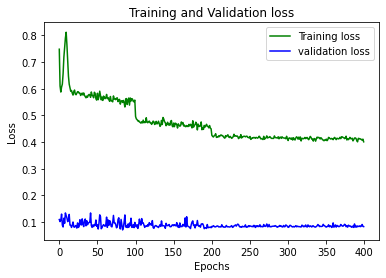

In [216]:
epochs = range(0,400)
plt.plot(epochs, dict['train_loss'], 'g', label='Training loss')
plt.plot(epochs, dict['val_loss'], 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

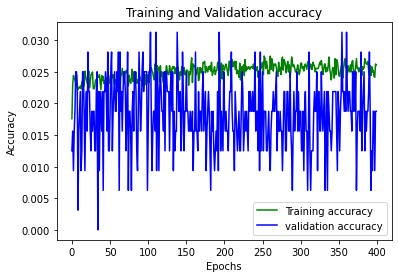

In [217]:
epochs = range(0,400)
plt.plot(epochs, dict['train_acc'], 'g', label='Training accuracy')
plt.plot(epochs, dict['val_acc'], 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

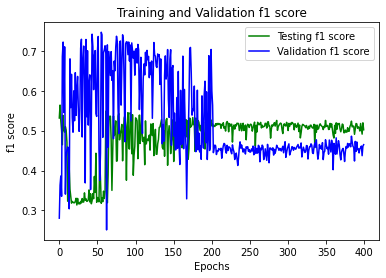

In [218]:
epochs = range(0,400)
plt.plot(epochs, dict['test_f1'], 'g', label='Testing f1 score')
plt.plot(epochs, dict['val_f1'], 'b', label='Validation f1 score')
plt.title('Training and Validation f1 score')
plt.xlabel('Epochs')
plt.ylabel('f1 score')
plt.legend()
plt.show()

In [219]:
u['tree'] = 4

NameError: name 'u' is not defined

In [16]:
import numpy as np
import torch
import torchvision.transforms as transforms

def get_dataset_info(dataset):
    if dataset == 'opportunity':
        from data import opportunity
        dataset = opportunity.OpportunityDataset
        val_id = [[0,1]]
        test_id = [[1,3],[1,4],[2,3],[2,4]]
        train_id = [[0,0],[0,1],[0,2],[0,3],[0,4],[0,5],
                    [1,0],[1,1],[1,2],[1,5],
                    [2,0],[2,1],[1,2],[2,5],
                    [3,0],[3,1],[3,2],[3,3],[3,4],[3,5]]
        kwargs = {'locomotion': True}
        if kwargs['locomotion'] == True:
            num_classes = 5
        else:
            num_classes = 18

    elif dataset == 'pamap2':
        from data import pamap2
        dataset = pamap2.PAMAP2Dataset
        val_id = [4]
        test_id = [5]
        train_id = [0, 1, 2, 3, 6, 7]
        num_classes = 13
        kwargs = {}

    elif dataset == 'daphnet':
        from data import daphnet
        dataset = daphnet.DaphNetDataset
        val_id = [8]
        test_id = [1]
        train_id = [0, 2, 3, 4, 5, 6, 7, 9]
        num_classes = 2
        kwargs = {}

    return {'dataset' : dataset, 'train' : train_id, 'test' : test_id, 'validation' : val_id, 'kwargs': kwargs, 'num_classes': num_classes}

def data_transforms_float(x):
	return torch.from_numpy(x).type(torch.FloatTensor)

def data_transforms_long(x):
	return torch.from_numpy(x).type(torch.LongTensor)

dataset_info = get_dataset_info('pamap2')
input_transform = transforms.Compose([
    transforms.Lambda(data_transforms_float)
])
target_transform = transforms.Compose([
    transforms.Lambda(data_transforms_long)
])

downsample = 3
pretraining = False
window_size = 84
sliding_window = True
step = 3

test = dataset_info['dataset'](fileIndex=dataset_info['test'], transform=input_transform, target_transform=target_transform, pretraining=pretraining, **dataset_info['kwargs'])
test.generate_data(window_size=window_size, step_size=step, downsample=downsample, slide_window=sliding_window)
id2label = test.id2label
label2id = test.label2id

num_classes = dataset_info['num_classes']

[[    0     1     2     3     4     5     6     7     8     9    10    11]
 [23340 23041 24356 25721 22825 20486 26686 13291 11272 21078 37744   256]]
[[    0     1     2     3     4     5     6     7     8     9    10    11]
 [23340 23041 24356 25721 22825 20486 26686 13291 11272 21078 37744   256]]


In [65]:
count = np.array(np.unique(test.data['targets'], return_counts=True))
print(count)
print(id2label)
print(label2id)
print(num_classes)

[[    0     1     2     3     4]
 [ 8117 12286  9215  8088  1852]]
['Other', 'Stand', 'Walk', 'Sit', 'Lie']
{0: 0, 1: 1, 2: 2, 4: 3, 5: 4}
5


In [40]:
class_sample_count = np.array(np.unique(test.data['targets'], return_counts=True))[1]
print(class_sample_count)

[13133  1928]


In [6]:
from torch.utils.data import WeightedRandomSampler, DataLoader

class_sample_count = np.array(np.unique(test.data['targets'], return_counts=True))[1]
weight = 1. / class_sample_count
samples_weight = np.array([weight[t] for t in test.data['targets']])
samples_weight = torch.from_numpy(samples_weight)

sampler = WeightedRandomSampler(samples_weight.type('torch.DoubleTensor'), len(samples_weight))
loader = DataLoader(dataset=test,
                    batch_size=64,
                    sampler=sampler,
                    num_workers=0,
                    drop_last=True,
                    pin_memory=True)

print(len(loader))

618


In [64]:
random_sample = next(iter(loader))
print(random_sample[0].shape, random_sample[1].shape)
print(random_sample[1].flatten())
count = np.array(np.unique(random_sample[1].flatten(), return_counts=True))
print(count)

torch.Size([64, 113, 113]) torch.Size([64, 1, 1])
tensor([17,  4, 16, 14,  8, 17,  7, 16,  6, 12,  4,  2,  0,  2,  5,  3, 15,  6,
         0,  1,  9, 17, 14,  8, 17,  0, 13, 12,  0,  0, 13, 11,  3, 17,  1,  8,
         8,  8,  5, 14,  9,  1, 17, 12, 11, 10,  5,  9,  4, 13, 14,  0, 14,  1,
         3, 12, 15, 17,  3,  5,  4, 13,  4,  1])
[[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17]
 [ 6  5  2  4  5  4  2  1  5  3  1  2  4  4  5  2  2  7]]


In [45]:
print(test.data['inputs'].shape)

(39546, 113, 113)


In [3]:
print(test.data['targets'][0:100])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [ ]:
random_sample = next(iter(training_loader))

In [11]:
from models import MLPMixer, train
import torch

# model = MLPMixer.MlpMixer(image_height=113, image_width=window_size,
#                           patch_size=16, token_dim=128, channel_dim=1024,
#                           patch_dim=256, num_classes=train.num_classes(),
#                           num_blocks=12)


if pretraining:
    model = MLPMixer.MlpMixer(image_height=224, image_width=224,
                          patch_size=16, token_dim=384, channel_dim=3072,
                          patch_dim=768, num_classes=num_classes,
                          num_blocks=12)
else:
    model = MLPMixer.MlpMixer(image_height=40, image_width=84,
                          patch_size=4, token_dim=256, channel_dim=2048,
                          patch_dim=512, num_classes=num_classes,
                          num_blocks=10)

model = model.cuda()

In [41]:
from tqdm import tqdm
import itertools
import torch
import os
import numpy as np
import torch.nn as nn
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score, confusion_matrix

class AverageMeter(object):
    """Computes and stores the average and current value"""
    def __init__(self):
        self.reset()

    def reset(self):
        self.val = 0
        self.avg = 0
        self.sum = 0
        self.count = 0

    def update(self, val, n=1):
        self.val = val
        self.sum += val * n
        self.count += n
        self.avg = self.sum / self.count

def validate_batch(model, device, batch, validate_loss, eval_losses, all_preds, all_label):
    batch = tuple(t.to(device) for t in batch)
    x, y = batch
    with torch.no_grad():
        starter, ender = torch.cuda.Event(enable_timing=True),   torch.cuda.Event(enable_timing=True)
        starter.record()
        logits = model(x)
        ender.record()
        torch.cuda.synchronize()
        curr_time = starter.elapsed_time(ender)/1000

        eval_loss = validate_loss(logits, y.flatten())
        eval_losses.update(eval_loss.item())

        preds = torch.argmax(logits, dim=-1)

    if len(all_preds) == 0:
        all_preds.append(preds.cpu().numpy().reshape(-1))
        all_label.append(y.data.cpu().numpy().reshape(-1))
    else:
        all_preds[0] = np.append(
            all_preds[0], preds.cpu().numpy().reshape(-1)
        )
        all_label[0] = np.append(
            all_label[0], y.data.cpu().numpy().reshape(-1)
        )

    return curr_time

def simple_accuracy(preds, labels):
    return torch.mean(torch.eq(preds, labels).float(), dtype=torch.float)

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    # Calculate chart area size
    leftmargin = 0.5 # inches
    rightmargin = 0.5 # inches
    categorysize = 0.5 # inches
    figwidth = leftmargin + rightmargin + (len(classes) * categorysize)

    f = plt.figure(figsize=(figwidth, figwidth))

    # Create an axes instance and ajust the subplot size
    ax = f.add_subplot(111)
    ax.set_aspect(1)
    f.subplots_adjust(left=leftmargin/figwidth, right=1-rightmargin/figwidth, top=0.94, bottom=0.1)

    res = ax.imshow(cm, interpolation='nearest', cmap=cmap)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    ax.set_xticks(range(len(classes)))
    ax.set_yticks(range(len(classes)))
    ax.set_xticklabels(classes, rotation=90, ha='right')
    ax.set_yticklabels(classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    np.set_printoptions(precision=3)

    plt.xlabel('Predicted')
    plt.ylabel('Actual')

    plt.figure(figsize=(8.0, 5.0)) # in inches!
    plt.savefig('confusion_matrix.png', bbox_inches='tight')

def validate(test, model):
    test_loader = test
    process = "Test"
    current_process = "Testing"

    #create the evaluation loss class
    eval_losses = AverageMeter()

    #start evaluating the model on the repsective dataset loader
    model.eval()
    all_preds, all_label = [], []
    epoch_iterator = tqdm(test_loader,
                              desc=f"{current_process}... (loss=X.X)",
                              bar_format="{l_bar}{r_bar}",
                              dynamic_ncols=True)

    validate_loss = nn.CrossEntropyLoss()
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    total_time = 0
    repetitions = 0
    for step, batch in enumerate(epoch_iterator):
        repetitions += 1
        total_time += validate_batch(model, device, batch, validate_loss, eval_losses, all_preds, all_label)
        epoch_iterator.set_description(f"{current_process}... (loss=%2.5f)" % eval_losses.val)

    throughput = (repetitions*64)/total_time

    all_preds, all_label = all_preds[0], all_label[0]
    microf1 = f1_score(all_label, all_preds.flatten(), average='micro')
    macrof1 = f1_score(all_label, all_preds.flatten(), average='macro')
    weightedf1 = f1_score(all_label, all_preds.flatten(), average='weighted')
    accuracy = simple_accuracy(torch.from_numpy(all_preds), torch.from_numpy(all_label).flatten())

    cm = confusion_matrix(all_label, all_preds)
    plot_confusion_matrix(cm, classes=id2label, normalize=True)

    print("Throughput: ", throughput, "accuracy: ", accuracy, " micro_f1: ", microf1, " macro_f1: ", macrof1, " weighted_f1: ", weightedf1)

In [42]:
print(id2label)

['No freeze', 'freeze']


In [43]:
print(test.num_classes)

2


In [58]:
from models import MLPMixer, train
import torch
model = MLPMixer.MlpMixer(image_height=9, image_width=99,
                          patch_size=9, token_dim=256, channel_dim=512,
                          patch_dim=512, num_classes=2,
                          num_blocks=10)
model = model.cuda()

print(sum(p.numel() for p in model.parameters() if p.requires_grad))

path = "../saved/daphnet/daphnet_step3_window99_patch9_downsample2_lr0_01_channeldim512_s42_checkpoint.bin"
arr = torch.load(path)
model.load_state_dict(arr)

5460246


<All keys matched successfully>

In [59]:
print(model.kwargs)

{'image_height': 9, 'image_width': 99, 'patch_size': 9, 'token_dim': 256, 'channel_dim': 512, 'patch_dim': 512, 'num_classes': 2, 'num_blocks': 10}


[[    0     1]
 [13133  1928]]


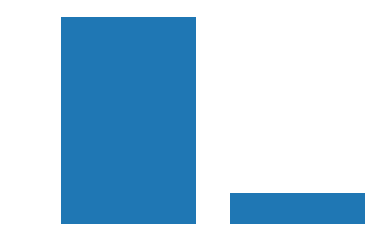

In [56]:
import matplotlib.pyplot as plt


count = np.array(np.unique(test.data['targets'], return_counts=True))
print(count)
params = {"ytick.color" : "w",
          "xtick.color" : "w",
          "axes.labelcolor" : "w",
          "axes.edgecolor" : "w"}
plt.rcParams.update(params)
plt.bar(count[0], count[1])
plt.show()

Testing... (loss=0.00005): 100%|| 235/235 [00:19<00:00, 11.85it/s]


Normalized confusion matrix
[[0.95881635 0.04118365]
 [0.25518672 0.74481328]]
Throughput:  804.1479009268191 accuracy:  tensor(0.9314)  micro_f1:  0.9313829787234043  macro_f1:  0.8481151549160287  weighted_f1:  0.9317418917570568


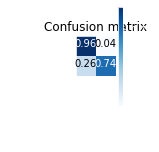

<Figure size 576x360 with 0 Axes>

In [60]:
path = "../saved/oppo_weighted_adam/oppo_gestures_lr0_01_checkpoint.bin"
from torch.utils.data import DataLoader, SequentialSampler

test_sampler = SequentialSampler(test)
testing_loader = DataLoader(dataset=test,
                            batch_size=64,
                            sampler=test_sampler,
                            num_workers=0,
                            drop_last=True,
                            pin_memory=True)

validate(testing_loader, model)

[[   0    1    2    3    4    5    6    7    8    9   10]
 [ 707  694  735  779  669  614  816  310  241  635 1186]]


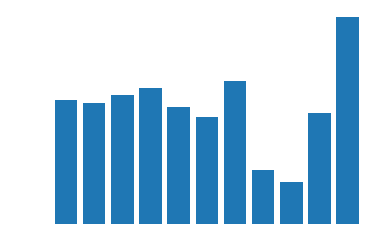

In [8]:
import matplotlib.pyplot as plt


count = np.array(np.unique(test.data['targets'], return_counts=True))
print(count)
params = {"ytick.color" : "w",
          "xtick.color" : "w",
          "axes.labelcolor" : "w",
          "axes.edgecolor" : "w"}
plt.rcParams.update(params)
plt.bar(count[0], count[1])
plt.show()

Testing... (loss=0.00006): 100%|| 115/115 [00:24<00:00,  4.68it/s]


Normalized confusion matrix
[[1.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.   ]
 [0.    1.    0.    0.    0.    0.    0.    0.    0.    0.    0.   ]
 [0.    0.    0.74  0.    0.    0.    0.    0.    0.    0.    0.26 ]
 [0.    0.    0.    0.983 0.    0.    0.004 0.012 0.001 0.    0.   ]
 [0.    0.    0.    0.    1.    0.    0.    0.    0.    0.    0.   ]
 [0.    0.    0.    0.    0.    1.    0.    0.    0.    0.    0.   ]
 [0.    0.    0.    0.    0.    0.    1.    0.    0.    0.    0.   ]
 [0.    0.    0.    0.    0.    0.    0.    1.    0.    0.    0.   ]
 [0.    0.    0.    0.    0.    0.    0.    0.004 0.996 0.    0.   ]
 [0.    0.008 0.044 0.    0.    0.    0.008 0.022 0.008 0.879 0.031]
 [0.    0.    0.013 0.    0.    0.003 0.    0.    0.    0.    0.984]]
accuracy:  tensor(0.9591)  micro_f1:  0.9591032608695652  macro_f1:  0.9633788302756411  weighted_f1:  0.9582244109812297


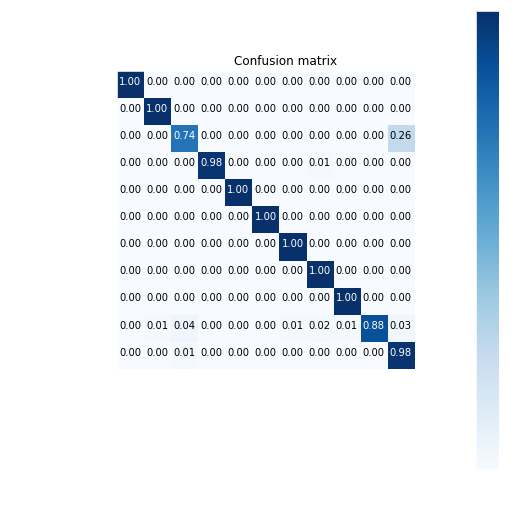

<Figure size 576x360 with 0 Axes>

In [25]:
path = "../saved/pamap2_weighted_adam/pamap2_step10_window84_downsample3_linear_lr0_01_final_checkpoint.bin"
from torch.utils.data import DataLoader, SequentialSampler

test_sampler = SequentialSampler(test)
testing_loader = DataLoader(dataset=test,
                            batch_size=64,
                            sampler=test_sampler,
                            num_workers=0,
                            drop_last=True,
                            pin_memory=True)

validate(testing_loader, model)

Testing... (loss=0.00207): 100%|| 617/617 [02:19<00:00,  4.41it/s] 


Normalized confusion matrix
[[9.719e-01 6.283e-04 3.291e-04 2.094e-04 1.197e-03 4.308e-03 2.513e-03
  3.531e-03 2.513e-03 3.560e-03 5.086e-04 3.890e-04 8.976e-05 5.774e-03
  1.316e-03 2.992e-04 5.386e-04 3.890e-04]
 [5.761e-01 4.045e-01 0.000e+00 1.942e-02 0.000e+00 0.000e+00 0.000e+00
  0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  0.000e+00 0.000e+00 0.000e+00 0.000e+00]
 [2.343e-01 0.000e+00 6.589e-01 0.000e+00 1.067e-01 0.000e+00 0.000e+00
  0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  0.000e+00 0.000e+00 0.000e+00 0.000e+00]
 [6.977e-02 3.643e-01 0.000e+00 5.349e-01 3.101e-02 0.000e+00 0.000e+00
  0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  0.000e+00 0.000e+00 0.000e+00 0.000e+00]
 [4.706e-03 0.000e+00 0.000e+00 0.000e+00 9.953e-01 0.000e+00 0.000e+00
  0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  0.000e+00 0.000e+00 0.000e+00 0.000e+00]
 [4.493e-01 0.000e+00 0.000e+00 0.000

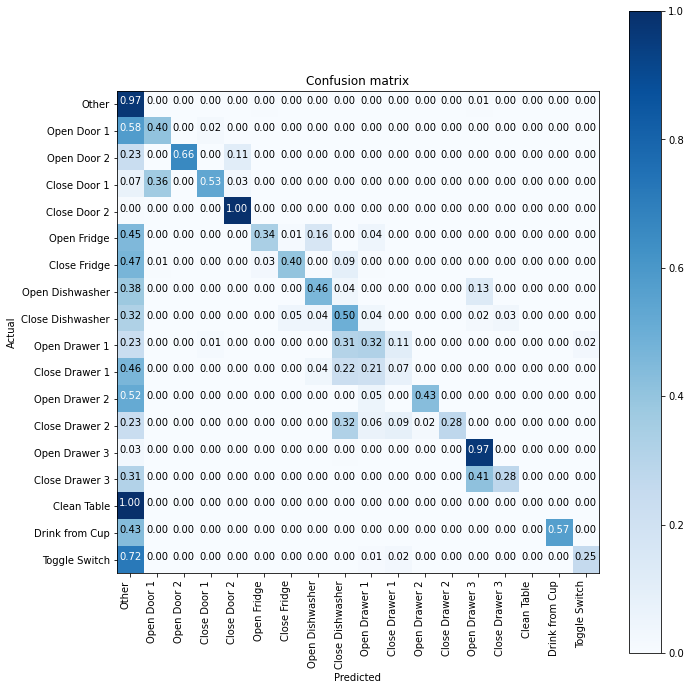

<Figure size 576x360 with 0 Axes>

In [23]:
path = "../saved/oppo_balanced/opportunity_gestures_norm_checkpoint.bin"
from torch.utils.data import DataLoader, SequentialSampler

test_sampler = SequentialSampler(test)
testing_loader = DataLoader(dataset=test,
                            batch_size=64,
                            sampler=test_sampler,
                            num_workers=0,
                            drop_last=True,
                            pin_memory=True)

validate(testing_loader, model)

Testing... (loss=1.21269): 100%|| 617/617 [02:20<00:00,  4.38it/s]


Normalized confusion matrix
[[0.59150629 0.30255366 0.09289415 0.00397853 0.00906736]
 [0.02844616 0.76344776 0.17762806 0.03047802 0.        ]
 [0.01427506 0.11292213 0.87280281 0.         0.        ]
 [0.01966788 0.         0.00494641 0.97114592 0.00423978]
 [0.00413508 0.         0.         0.         0.99586492]]
accuracy:  tensor(0.7956)  micro_f1:  0.7955834683954619  macro_f1:  0.8266151036930112  weighted_f1:  0.7941520258629297


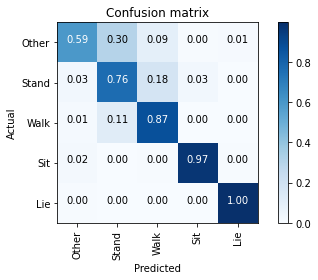

In [10]:
path = "../saved/oppo_balanced/opportunity_norm_checkpoint.bin"
from torch.utils.data import DataLoader, SequentialSampler

test_sampler = SequentialSampler(test)
testing_loader = DataLoader(dataset=test,
                            batch_size=64,
                            shuffle=True,
                            #sampler=test_sampler,
                            num_workers=0,
                            drop_last=True,
                            pin_memory=True)

validate(testing_loader, model)

In [45]:
from torch.utils.data import DataLoader, SequentialSampler

test_sampler = SequentialSampler(test)
testing_loader = DataLoader(dataset=test,
                            batch_size=64,
                            sampler=test_sampler,
                            num_workers=0,
                            drop_last=True,
                            pin_memory=True)

validate(testing_loader, model)

Testing... (loss=0.07888): 100%|| 205/205 [00:45<00:00,  4.47it/s] 

accuracy:  tensor(0.8830)  micro_f1:  0.8830030487804879  macro_f1:  0.48340883700506754  weighted_f1:  0.8736948242766541


In [1]:
import numpy as np
import torch
import torchvision.transforms as transforms

def get_dataset_info(dataset):
    if dataset == 'opportunity':
        from data import opportunity
        dataset = opportunity.OpportunityDataset
        val_id = [[0,1]]
        test_id = [[1,3],[1,4],[2,3],[2,4]]
        train_id = [[0,0],[0,1],[0,2],[0,3],[0,4],[0,5],
                    [1,0],[1,1],[1,2],[1,5],
                    [2,0],[2,1],[1,2],[2,5],
                    [3,0],[3,1],[3,2],[3,3],[3,4],[3,5]]
        kwargs = {'locomotion': False}
        if kwargs['locomotion'] == True:
            num_classes = 5
        else:
            num_classes = 18

    elif dataset == 'pamap2':
        from data import pamap2
        dataset = pamap2.PAMAP2Dataset
        val_id = [4]
        test_id = [5]
        train_id = [0, 1, 2, 3, 6, 7]
        num_classes = 13
        kwargs = {}

    elif dataset == 'daphnet':
        from data import daphnet
        dataset = daphnet.DaphNetDataset
        val_id = [8]
        test_id = [1]
        train_id = [0, 2, 3, 4, 5, 6, 7, 9]
        num_classes = 2
        kwargs = {}

    return {'dataset' : dataset, 'train' : train_id, 'test' : test_id, 'validation' : val_id, 'kwargs': kwargs, 'num_classes': num_classes}

def data_transforms_float(x):
	return torch.from_numpy(x).type(torch.FloatTensor)

def data_transforms_long(x):
	return torch.from_numpy(x).type(torch.LongTensor)

dataset_info = get_dataset_info('pamap2')
input_transform = transforms.Compose([
    transforms.Lambda(data_transforms_float)
])
target_transform = transforms.Compose([
    transforms.Lambda(data_transforms_long)
])

downsample = 3
pretraining = False
window_size = 84
sliding_window = True
step = 10

test = dataset_info['dataset'](fileIndex=dataset_info['test'], transform=input_transform, target_transform=target_transform, pretraining=pretraining, **dataset_info['kwargs'])
test.generate_data(window_size=window_size, step_size=step, downsample=downsample, slide_window=sliding_window)
id2label = test.id2label
label2id = test.label2id

num_classes = dataset_info['num_classes']


[[    0     1     2     3     4     5     6     7     8     9    10    11]
 [23330 22808 24064 25356 22191 20432 26490 13285 11258 21029 37584   253]]
[[    0     1     2     3     4     5     6     7     8     9    10]
 [21330 20807 22063 23355 20190 18431 24489  9283  7256 19028 35583]]


In [8]:
print(test.columns)
print(len(test.columns))

['heartrate', 'handTemperature', 'handAcc16_1', 'handAcc16_2', 'handAcc16_3', 'handAcc6_1', 'handAcc6_2', 'handAcc6_3', 'handGyro1', 'handGyro2', 'handGyro3', 'handMagne1', 'handMagne2', 'handMagne3', 'chestTemperature', 'chestAcc16_1', 'chestAcc16_2', 'chestAcc16_3', 'chestAcc6_1', 'chestAcc6_2', 'chestAcc6_3', 'chestGyro1', 'chestGyro2', 'chestGyro3', 'chestMagne1', 'chestMagne2', 'chestMagne3', 'ankleTemperature', 'ankleAcc16_1', 'ankleAcc16_2', 'ankleAcc16_3', 'ankleAcc6_1', 'ankleAcc6_2', 'ankleAcc6_3', 'ankleGyro1', 'ankleGyro2', 'ankleGyro3', 'ankleMagne1', 'ankleMagne2', 'ankleMagne3']
40


In [38]:
print(id2label)
print(label2id)
print(num_classes)

count = np.array(np.unique(test.data['targets'], return_counts=True))
print(count)

['Other', 'Open Door 1', 'Open Door 2', 'Close Door 1', 'Close Door 2', 'Open Fridge', 'Close Fridge', 'Open Dishwasher', 'Close Dishwasher', 'Open Drawer 1', 'Close Drawer 1', 'Open Drawer 2', 'Close Drawer 2', 'Open Drawer 3', 'Close Drawer 3', 'Clean Table', 'Drink from Cup', 'Toggle Switch']
{0: 0, 406516: 1, 406517: 2, 404516: 3, 404517: 4, 406520: 5, 404520: 6, 406505: 7, 404505: 8, 406519: 9, 404519: 10, 406511: 11, 404511: 12, 406508: 13, 404508: 14, 408512: 15, 407521: 16, 405506: 17}
18
[[     0      1      2      3      4      5      6      7      8      9
      10     11     12     13     14     15     16     17]
 [176324   4624   4614   4388   4415   5111   4996   3694   3471   2822
    2210   2612   2312   3053   2935   5259  16732   3120]]


In [20]:
print(test.data['inputs'].shape)

(7386, 40, 84)


In [19]:
print(test.data['targets'].shape)

(7386,)


In [5]:
test.data['inputs'].head()

AttributeError: 'numpy.ndarray' object has no attribute 'head'

[[    0     1     2     3     4     5     6     7     8     9    10    11
     12    13    14    15    16    17]
 [32891   227   380   235   329   925   657   398   320   153   162   167
    116   265   243   386  1271   433]]


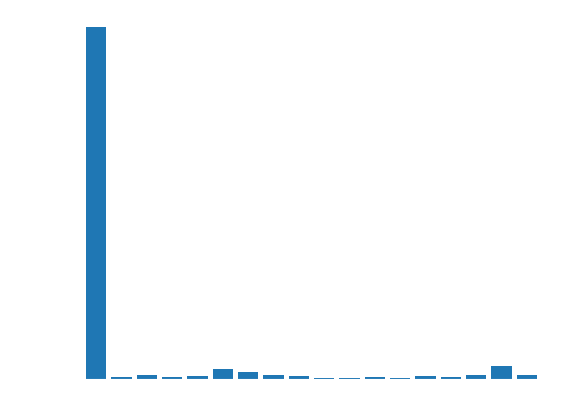

In [32]:
import matplotlib.pyplot as plt

count = np.array(np.unique(test.data['targets'], return_counts=True))
print(count)
params = {"ytick.color": "w",
          "xtick.color": "w",
          "axes.labelcolor": "w",
          "axes.edgecolor": "w"}
plt.rcParams.update(params)
plt.bar(count[0], count[1])
plt.show()

[[0.000e+00 1.004e-04 1.277e-04 ... 9.999e-01 9.999e-01 1.000e+00]
 [2.399e+06 2.500e+01 2.600e+01 ... 7.700e+01 2.500e+01 2.208e+03]]


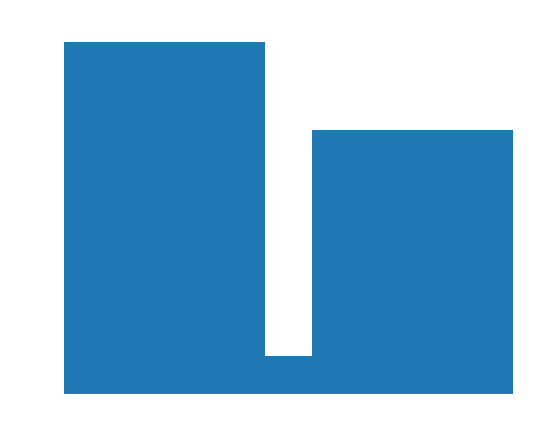

In [36]:
import matplotlib.pyplot as plt

count = np.array(np.unique(test.data['inputs'], return_counts=True))
print(count)
params = {"ytick.color": "w",
          "xtick.color": "w",
          "axes.labelcolor": "w",
          "axes.edgecolor": "w"}
plt.rcParams.update(params)
plt.bar(count[0], count[1])
plt.show()

[[    0     1     2     3     4     5     6     7     8     9    10    11
     12    13    14    15    16    17]
 [32891   227   380   235   329   925   657   398   320   153   162   167
    116   265   243   386  1271   433]]


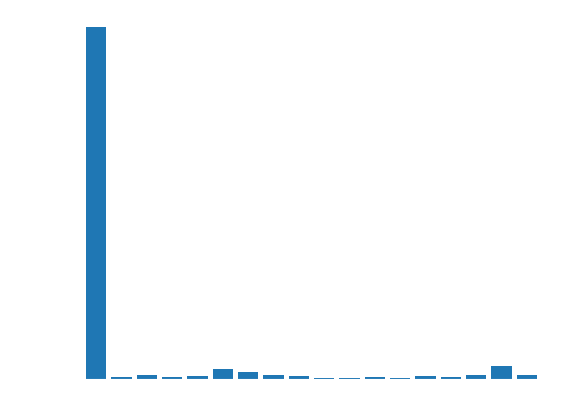

In [35]:
import matplotlib.pyplot as plt

count = np.array(np.unique(test.data['targets'], return_counts=True))
print(count)
params = {"ytick.color": "w",
          "xtick.color": "w",
          "axes.labelcolor": "w",
          "axes.edgecolor": "w"}
plt.rcParams.update(params)
plt.bar(count[0], count[1])
plt.show()

In [63]:
import numpy as np

b = np.array([0.90375,0.89019,0.90641,0.90274,0.90418])

t = np.array([0.89388,0.88416,0.89335,0.89982,0.89951])

print(b.mean(), b.std())
print(t.mean(), t.std())

0.901454 0.005758404640175954
0.894144 0.00568139630724703


['lying', 'sitting', 'standing', 'walking', 'running', 'cycling', 'Nordic walking', 'ascending stairs', 'descending stairs', 'vacuum cleaning', 'ironing', 'rope jumping']


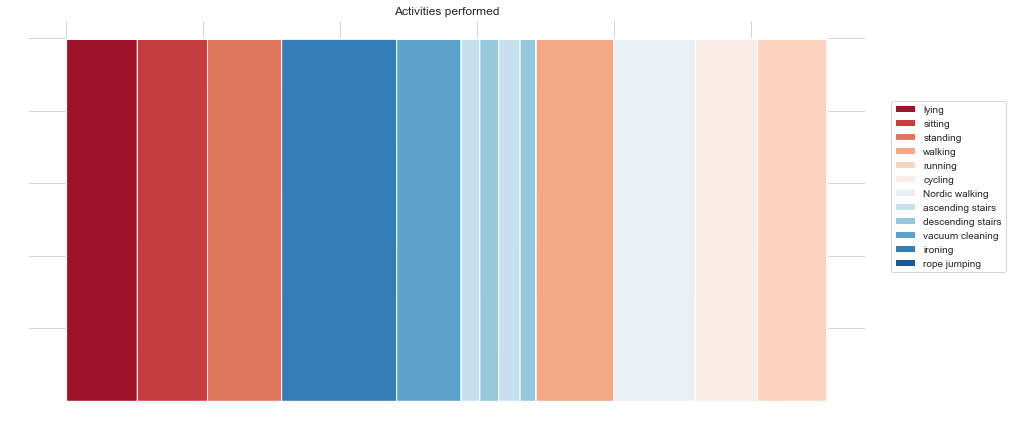

In [19]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = np.zeros((len(id2label), len(test.data['targets'])))
for i, v in enumerate(test.data['targets']):
    data[v][i] = 1

split = [data[i] for i in range(len(data))]
x = [i for i in range(len(test.data['targets']))]
# create a horizontal plot
fig = plt.figure(figsize=(15,7))
colors = sns.color_palette("RdBu", len(id2label))

labels = id2label
print(id2label)
plt.stackplot(x, split, colors=colors, labels=labels)
plt.legend(loc = "upper center", bbox_to_anchor=(1.1, 0.8), ncol=1)
plt.title("Activities performed")
plt.show()

['lying', 'sitting', 'standing', 'walking', 'running', 'cycling', 'Nordic walking', 'ascending stairs', 'descending stairs', 'vacuum cleaning', 'ironing', 'rope jumping']


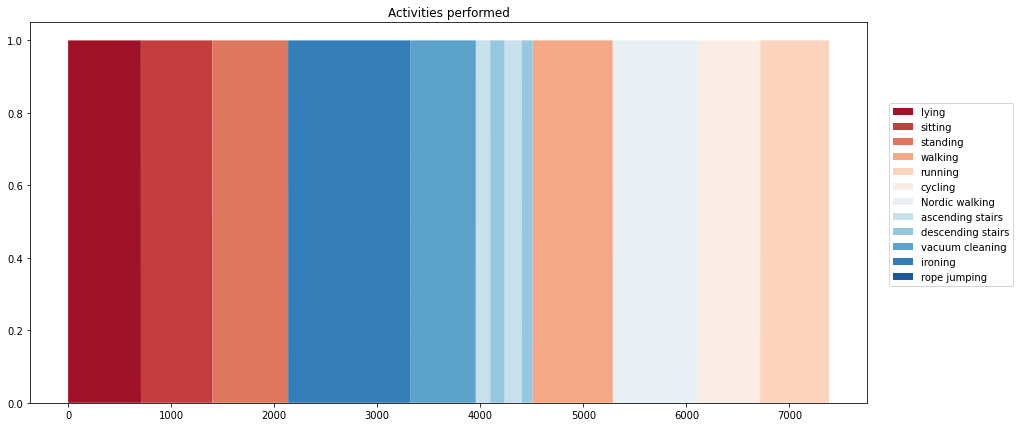

In [21]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = np.zeros((len(id2label), len(test.data['targets'])))
for i, v in enumerate(test.data['targets']):
    data[v][i] = 1

split = [data[i] for i in range(len(data))]
x = [i for i in range(len(test.data['targets']))]
# create a horizontal plot
fig = plt.figure(figsize=(15,7))
colors = sns.color_palette("RdBu", len(id2label))

labels = id2label
print(id2label)
plt.stackplot(x, split, colors=colors, labels=labels)
plt.legend(loc = "upper center", bbox_to_anchor=(1.1, 0.8), ncol=1)
plt.title("Activities performed")
plt.show()

[[   0    1    2    3    4    5    6    7    8    9   10   11]
 [2580 2560 2706 2858 2537 2276 2965 1478 1251 2342 4194   14]]
['lying', 'sitting', 'standing', 'walking', 'running', 'cycling', 'Nordic walking', 'ascending stairs', 'descending stairs', 'vacuum cleaning', 'ironing', 'rope jumping']


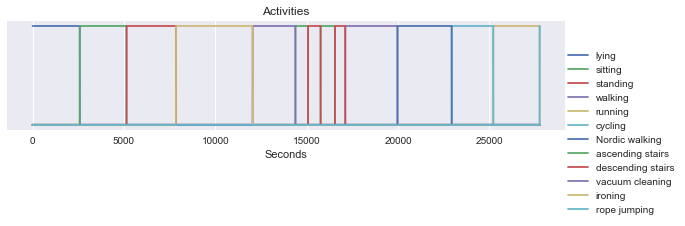

In [20]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("seaborn")

count = np.array(np.unique(test.data['targets'], return_counts=True))
print(count)
print(id2label)
data = np.zeros((len(id2label), len(test.data['targets'])))
for i, v in enumerate(test.data['targets']):
    data[v][i] = 1

#split = [data[i] for i in range(len(data))]
x = np.array(range(len(test.data['targets'])))

#x = np.linspace(0, (1/30 * len(test.data['targets'])), num=len(test.data['targets']), endpoint=True, retstep=False, dtype=None, axis=0)

fig = plt.figure(figsize=(10,2))
colors = sns.color_palette("RdBu", len(id2label))

for i in range(len(id2label)):
    plt.plot(x, data[i], label=id2label[i])

plt.legend(loc = "upper center", bbox_to_anchor=(1.1, 0.8), ncol=1)
plt.title('Activities')
plt.xlabel('Seconds')

plt.yticks([])

plt.show()


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("seaborn")

count = np.array(np.unique(test.data['targets'], return_counts=True))
print(count)
print(id2label)
data = np.zeros((len(id2label), len(test.data['targets'])))
for i, v in enumerate(test.data['targets']):
    data[v][i] = 1

#split = [data[i] for i in range(len(data))]
x = np.array(range(len(test.data['targets'])))

#x = np.linspace(0, (1/30 * len(test.data['targets'])), num=len(test.data['targets']), endpoint=True, retstep=False, dtype=None, axis=0)

fig = plt.figure(figsize=(10,2))
colors = sns.color_palette("RdBu", len(id2label))

for i in range(len(id2label)):
    plt.plot(x, data[i], label=id2label[i])

plt.legend(loc = "upper center", bbox_to_anchor=(1.1, 0.8), ncol=1)
plt.title('Activities')
plt.xlabel('Seconds')

plt.yticks([])

plt.show()


In [2]:
from tqdm import tqdm
import itertools
import torch
import os
import numpy as np
import torch.nn as nn
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score, confusion_matrix
import seaborn as sns

class AverageMeter(object):
    """Computes and stores the average and current value"""
    def __init__(self):
        self.reset()

    def reset(self):
        self.val = 0
        self.avg = 0
        self.sum = 0
        self.count = 0

    def update(self, val, n=1):
        self.val = val
        self.sum += val * n
        self.count += n
        self.avg = self.sum / self.count

def validate_batch(model, device, batch, validate_loss, eval_losses, all_preds, all_label, all_prob):
    batch = tuple(t.to(device) for t in batch)
    x, y = batch
    with torch.no_grad():
        starter, ender = torch.cuda.Event(enable_timing=True),   torch.cuda.Event(enable_timing=True)
        starter.record()
        logits = model(x)
        ender.record()
        torch.cuda.synchronize()
        curr_time = starter.elapsed_time(ender)/1000

        eval_loss = validate_loss(logits, y.flatten())
        eval_losses.update(eval_loss.item())

        preds = torch.argmax(logits, dim=-1)

    if len(all_preds) == 0:
        all_preds.append(preds.cpu().numpy().reshape(-1))
        all_label.append(y.data.cpu().numpy().reshape(-1))
    else:
        all_preds[0] = np.append(
            all_preds[0], preds.cpu().numpy().reshape(-1)
        )
        all_label[0] = np.append(
            all_label[0], y.data.cpu().numpy().reshape(-1)
        )

    return curr_time, logits.data.cpu().numpy()

def simple_accuracy(preds, labels):
    return torch.mean(torch.eq(preds, labels).float(), dtype=torch.float)

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    # ax = sns.heatmap(cm, annot=True, cmap='Blues')
    #
    # ax.set_title('Confusion Matrix with labels\n\n');
    # ax.set_xlabel('\nPredicted Values')
    # ax.set_ylabel('Actual Values ');
    #
    # ax.set_xticks(range(len(classes)))
    # ax.set_yticks(range(len(classes)))
    # ax.set_xticklabels(classes, rotation=90, ha='right')
    # ax.set_yticklabels(classes)
    # #ax.xaxis.set_ticklabels(['False','True'])
    # #ax.yaxis.set_ticklabels(['False','True'])
    #
    # ## Display the visualization of the Confusion Matrix.
    # plt.show()

    # plt.imshow(cm, interpolation='nearest', cmap=cmap)
    # plt.title(title)
    # plt.colorbar()
    # tick_marks = np.arange(len(classes))
    # plt.xticks(tick_marks, [value for value in classes], rotation=90)
    # plt.yticks(tick_marks, [value for value in classes])

    plt.style.use("default")

    # Calculate chart area size
    leftmargin = 0.75  # inches
    rightmargin = 0.75  # inches
    categorysize = 0.75  # inches
    figwidth = leftmargin + rightmargin + (len(classes) * categorysize)

    f = plt.figure(figsize=(figwidth, figwidth))

    # Create an axes instance and ajust the subplot size
    ax = f.add_subplot(111)
    ax.set_aspect(1)
    f.subplots_adjust(left=leftmargin / figwidth, right=1 - rightmargin / figwidth, top=0.94, bottom=0.1)

    res = ax.imshow(cm, interpolation='nearest', cmap=cmap)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    ax.set_xticks(range(len(classes)))
    ax.set_yticks(range(len(classes)))
    ax.set_xticklabels(classes, rotation=90, ha='right')
    ax.set_yticklabels(classes)


    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    np.set_printoptions(precision=3)

    ax.set_xlabel('Predicted', fontsize=11, labelpad=5)
    ax.set_ylabel('Actual', fontsize=11, labelpad=5)

    ax.title.set_color('black')
    ax.xaxis.label.set_color('black')
    ax.yaxis.label.set_color('black')
    ax.tick_params(colors='black', which='both')

    plt.savefig('confusion_matrix.png', bbox_inches='tight')

def validate(test, model):
    test_loader = test
    process = "Test"
    current_process = "Testing"

    #create the evaluation loss class
    eval_losses = AverageMeter()

    #start evaluating the model on the repsective dataset loader
    model.eval()
    all_preds, all_label = [], []
    all_prob = np.empty((0, len(id2label)))
    epoch_iterator = tqdm(test_loader,
                              desc=f"{current_process}... (loss=X.X)",
                              bar_format="{l_bar}{r_bar}",
                              dynamic_ncols=True)

    validate_loss = nn.CrossEntropyLoss()
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    total_time = 0
    repetitions = 0
    for step, batch in enumerate(epoch_iterator):
        repetitions += 1
        curr_time, logits = validate_batch(model, device, batch, validate_loss, eval_losses, all_preds, all_label, all_prob)
        total_time += curr_time
        all_prob = np.vstack((all_prob, logits))
        epoch_iterator.set_description(f"{current_process}... (loss=%2.5f)" % eval_losses.val)

    throughput = (repetitions*64)/total_time

    all_preds, all_label = all_preds[0], all_label[0]
    microf1 = f1_score(all_label, all_preds.flatten(), average='micro')
    macrof1 = f1_score(all_label, all_preds.flatten(), average='macro')
    weightedf1 = f1_score(all_label, all_preds.flatten(), average='weighted')
    accuracy = simple_accuracy(torch.from_numpy(all_preds), torch.from_numpy(all_label).flatten())

    cm = confusion_matrix(all_label, all_preds)
    newLabel = id2label.copy()
    newLabel.pop()
    plot_confusion_matrix(cm, classes=newLabel, normalize=True)

    print("Throughput: ", throughput, "accuracy: ", accuracy, " micro_f1: ", microf1, " macro_f1: ", macrof1, " weighted_f1: ", weightedf1)
    return all_label, all_preds, all_prob

In [19]:
from models import MLPMixer, train
import torch
model = MLPMixer.MlpMixer(image_height=40, image_width=84,
                          patch_size=4, token_dim=512, channel_dim=2048,
                          patch_dim=512, num_classes=12,
                          num_blocks=10)
model = model.cuda()

print(sum(p.numel() for p in model.parameters() if p.requires_grad))

path = "../saved/pamap2/pamap2_step10_window84_patch4_downsample3_lr0_01_tokendim512_s42_final_checkpoint.bin"
arr = torch.load(path)
model.load_state_dict(arr)

23208166


<All keys matched successfully>

In [35]:
import torch
import torchvision
import  torchvision.transforms as transforms

def saliency(img, model):
    #we don't need gradients w.r.t. weights for a trained model
    for param in model.parameters():
        param.requires_grad = False

    #set model in eval mode
    model.eval()
    #transforms input PIL image to torch.Tensor and normalize


    device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
    input = torch.from_numpy(img).float().to(device)

    #we want to calculate gradient of higest score w.r.t. input
    #so set requires_grad to True for input
    input = torch.unsqueeze(input, 0)
    input.requires_grad = True
    #forward pass to calculate predictions
    preds = model(input)
    score, indices = torch.max(preds, 1)
    #backward pass to get gradients of score predicted class w.r.t. input image
    score.backward()
    #get max along channel axis
    slc = torch.abs(input.grad[0])
    #normalize to [0..1]
    slc = (slc - slc.min())/(slc.max()-slc.min())

    # #plot image and its saleincy map
    # plt.figure(figsize=(10, 10))
    # plt.subplot(1, 2, 1)
    # plt.imshow(np.transpose(input.cpu().detach().numpy(), (1, 2, 0)))
    # plt.xticks([])
    # plt.yticks([])
    # plt.subplot(1, 2, 2)
    # plt.imshow(slc.cpu().numpy(), cmap=plt.cm.hot)
    # plt.xticks([])
    # plt.yticks([])
    # plt.show()

    return slc.cpu(), torch.argmax(preds, dim=-1)

In [56]:
print(test.data['inputs'][0].shape)
print(test.columns)

(40, 84)
['heartrate', 'handTemperature', 'handAcc16_1', 'handAcc16_2', 'handAcc16_3', 'handAcc6_1', 'handAcc6_2', 'handAcc6_3', 'handGyro1', 'handGyro2', 'handGyro3', 'handMagne1', 'handMagne2', 'handMagne3', 'chestTemperature', 'chestAcc16_1', 'chestAcc16_2', 'chestAcc16_3', 'chestAcc6_1', 'chestAcc6_2', 'chestAcc6_3', 'chestGyro1', 'chestGyro2', 'chestGyro3', 'chestMagne1', 'chestMagne2', 'chestMagne3', 'ankleTemperature', 'ankleAcc16_1', 'ankleAcc16_2', 'ankleAcc16_3', 'ankleAcc6_1', 'ankleAcc6_2', 'ankleAcc6_3', 'ankleGyro1', 'ankleGyro2', 'ankleGyro3', 'ankleMagne1', 'ankleMagne2', 'ankleMagne3']
['lying', 'sitting', 'standing', 'walking', 'running', 'cycling', 'Nordic walking', 'ascending stairs', 'descending stairs', 'vacuum cleaning', 'ironing', 'rope jumping']


label:Vacuum cleaning, prediction:Vacuum cleaning


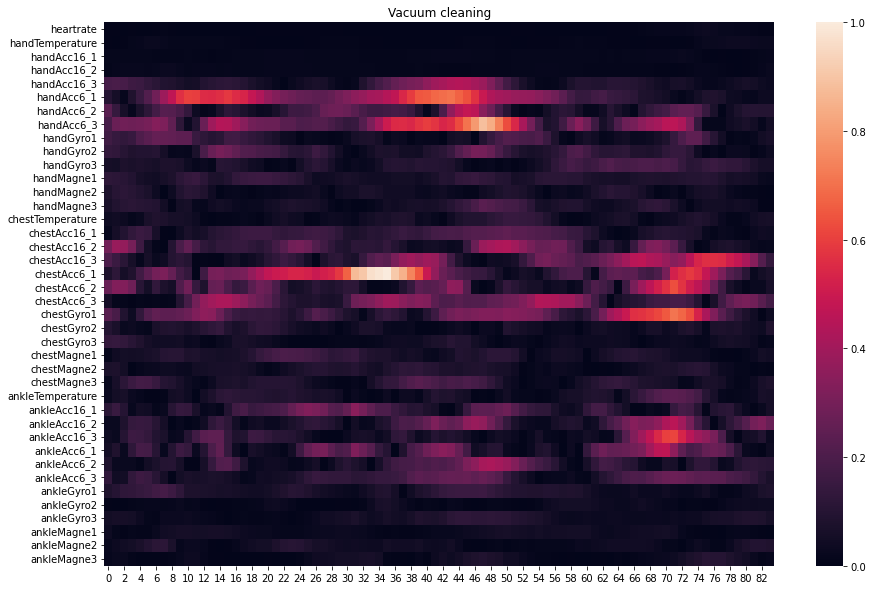

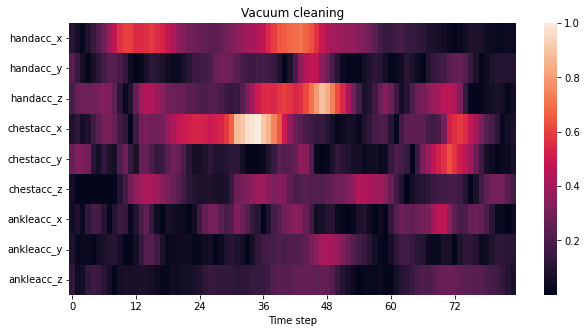

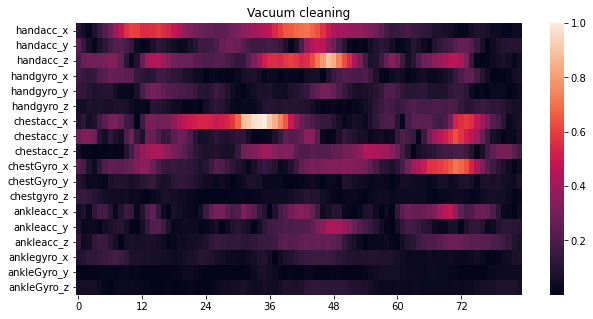

In [120]:
#banger weight maps
# running = [6800]
# cycling = [6400,]
# ascending = [4077, ]
# ironing = [3000,]
# lying =   [120,]
# vaccuum = [3800]

id2label = ['Lying', 'Sitting', 'Standing', 'Walking', 'Running', 'Cycling', 'Nordic walking', 'Ascending stairs', 'Descending stairs', 'Vacuum cleaning', 'Ironing', 'Rope jumping']

idx = 3800
z = test.data['inputs'][idx].copy()
slc, out = saliency(z, model)

output = f"label:{id2label[test.data['targets'][idx]]}, prediction:{id2label[out]}"
print(output)

import matplotlib.pyplot as plt
import seaborn as sns

y_cols = ['heartrate', 'handTemperature', 'handAcc16_1', 'handAcc16_2', 'handAcc16_3', 'handAcc6_1', 'handAcc6_2', 'handAcc6_3', 'handGyro1', 'handGyro2', 'handGyro3', 'handMagne1', 'handMagne2', 'handMagne3', 'chestTemperature', 'chestAcc16_1', 'chestAcc16_2', 'chestAcc16_3', 'chestAcc6_1', 'chestAcc6_2', 'chestAcc6_3', 'chestGyro1', 'chestGyro2', 'chestGyro3', 'chestMagne1', 'chestMagne2', 'chestMagne3', 'ankleTemperature', 'ankleAcc16_1', 'ankleAcc16_2', 'ankleAcc16_3', 'ankleAcc6_1', 'ankleAcc6_2', 'ankleAcc6_3', 'ankleGyro1', 'ankleGyro2', 'ankleGyro3', 'ankleMagne1', 'ankleMagne2', 'ankleMagne3']

title = f"{id2label[test.data['targets'][idx]]}"
#ax = sns.heatmap(slc, yticklabels=y_axis_labels).set(title=title)
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(slc, yticklabels=y_cols, ax=ax).set(title=title)
plt.show()


cols = [5, 6, 7, 18, 19, 20, 31, 32, 33]
gcols = [5, 6, 7, 8, 9, 10, 18, 19, 20, 21, 22, 23, 31, 32, 33, 34, 35, 36]

# labels for y-axis
y_labels = ["handacc_x","handacc_y","handacc_z","chestacc_x","chestacc_y","chestacc_z","ankleacc_x","ankleacc_y","ankleacc_z"]
y_glabels = ["handacc_x","handacc_y","handacc_z",'handgyro_x', 'handgyro_y', 'handgyro_z',"chestacc_x","chestacc_y","chestacc_z",'chestGyro_x', 'chestGyro_y', 'chestgyro_z',"ankleacc_x","ankleacc_y","ankleacc_z",'anklegyro_x', 'ankleGyro_y', 'ankleGyro_z',]
#labels for x-axis
title = f"{id2label[test.data['targets'][idx]]}"
#ax = sns.heatmap(slc, yticklabels=y_axis_labels).set(title=title)
fig, ax = plt.subplots(figsize=(10,5))
sns.heatmap(slc[cols, :], yticklabels=y_labels, xticklabels=12, ax=ax).set(title=title)
plt.xlabel("Time step")
plt.show()

#labels for x-axis
title = f"{id2label[test.data['targets'][idx]]}"
#ax = sns.heatmap(slc, yticklabels=y_axis_labels).set(title=title)
fig, ax = plt.subplots(figsize=(10,5))
sns.heatmap(slc[gcols, :], yticklabels=y_glabels, xticklabels=12, ax=ax).set(title=title)
plt.show()

In [345]:
for name, param in model.named_parameters():
    if param.requires_grad:
        if "token_mixing" in name:
            print(name)


MixerBlock.0.token_mixing.fc.weight
MixerBlock.0.token_mixing.fc.bias
MixerBlock.0.token_mixing.fc2.weight
MixerBlock.0.token_mixing.fc2.bias
MixerBlock.1.token_mixing.fc.weight
MixerBlock.1.token_mixing.fc.bias
MixerBlock.1.token_mixing.fc2.weight
MixerBlock.1.token_mixing.fc2.bias
MixerBlock.2.token_mixing.fc.weight
MixerBlock.2.token_mixing.fc.bias
MixerBlock.2.token_mixing.fc2.weight
MixerBlock.2.token_mixing.fc2.bias
MixerBlock.3.token_mixing.fc.weight
MixerBlock.3.token_mixing.fc.bias
MixerBlock.3.token_mixing.fc2.weight
MixerBlock.3.token_mixing.fc2.bias
MixerBlock.4.token_mixing.fc.weight
MixerBlock.4.token_mixing.fc.bias
MixerBlock.4.token_mixing.fc2.weight
MixerBlock.4.token_mixing.fc2.bias
MixerBlock.5.token_mixing.fc.weight
MixerBlock.5.token_mixing.fc.bias
MixerBlock.5.token_mixing.fc2.weight
MixerBlock.5.token_mixing.fc2.bias
MixerBlock.6.token_mixing.fc.weight
MixerBlock.6.token_mixing.fc.bias
MixerBlock.6.token_mixing.fc2.weight
MixerBlock.6.token_mixing.fc2.bias
MixerB

In [ ]:
indices_add = []
for i, layer in enumerate(mlp_mixer.layers):
    if isinstance(layer, tf.keras.layers.Add):
        print(f"Residual layer found at location: {i}")
        indices_add.append(i)

In [28]:
print(id2label)

['Other', 'Open Door 1', 'Open Door 2', 'Close Door 1', 'Close Door 2', 'Open Fridge', 'Close Fridge', 'Open Dishwasher', 'Close Dishwasher', 'Open Drawer 1', 'Close Drawer 1', 'Open Drawer 2', 'Close Drawer 2', 'Open Drawer 3', 'Close Drawer 3', 'Clean Table', 'Drink from Cup', 'Toggle Switch']


In [17]:
from models import MLPMixer, train
import torch
model = MLPMixer.MlpMixer(image_height=77, image_width=77,
                          patch_size=11, token_dim=256, channel_dim=2048,
                          patch_dim=512, num_classes=18,
                          num_blocks=10)
model = model.cuda()

print(sum(p.numel() for p in model.parameters() if p.requires_grad))

path = "../saved/oppo/oppo_gestures_step3_window77_patch11_downsample3_lr0_01_s42_checkpoint.bin"
arr = torch.load(path)
model.load_state_dict(arr)

from torch.utils.data import DataLoader, SequentialSampler

test_sampler = SequentialSampler(test)
testing_loader = DataLoader(dataset=test,
                            batch_size=64,
                            sampler=test_sampler,
                            num_workers=0,
                            drop_last=True,
                            pin_memory=True)

label, pred, prob = validate(testing_loader, model)

from sklearn.metrics import classification_report
print(classification_report(label, pred, target_names=id2label))

21468834


Testing... (loss=X.X):   0%|| 0/388 [00:00<?, ?it/s]


RuntimeError: mat1 and mat2 shapes cannot be multiplied (32768x21 and 49x256)

23208166


Testing... (loss=0.00023): 100%|| 115/115 [00:28<00:00,  4.05it/s]


Normalized confusion matrix
[[1.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 1.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 7.57823129e-01 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 2.42176871e-01]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 9.83311938e-01
  0.00000000e+00 0.00000000e+00 6.41848524e-03 8.98587933e-03
  1.28369705e-03 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  1.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 1.00000000e+00 0.00000000e+00 0.0

ValueError: Number of classes, 11, does not match size of target_names, 12. Try specifying the labels parameter

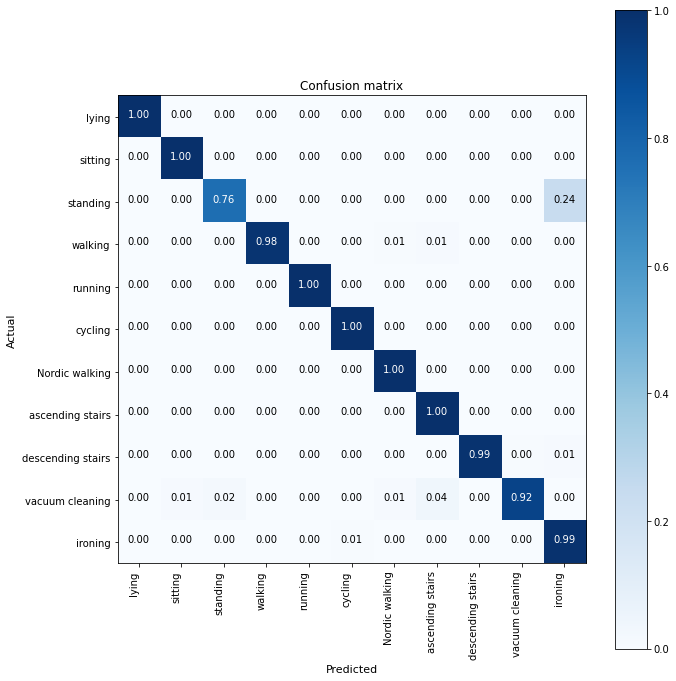

In [3]:
from models import MLPMixer, train
import torch
model = MLPMixer.MlpMixer(image_height=40, image_width=84,
                          patch_size=4, token_dim=512, channel_dim=2048,
                          patch_dim=512, num_classes=12,
                          num_blocks=10)
model = model.cuda()

print(sum(p.numel() for p in model.parameters() if p.requires_grad))

path = "../saved/pamap2/pamap2_step10_window84_patch4_downsample3_lr0_01_tokendim512_s42_final_checkpoint.bin"
arr = torch.load(path)
model.load_state_dict(arr)


from torch.utils.data import DataLoader, SequentialSampler

test_sampler = SequentialSampler(test)
testing_loader = DataLoader(dataset=test,
                            batch_size=64,
                            sampler=test_sampler,
                            num_workers=0,
                            drop_last=True,
                            pin_memory=True)

label, pred, prob = validate(testing_loader, model)
#
from sklearn.metrics import classification_report
print(classification_report(label, pred, target_names=id2label))

5475636


Testing... (loss=0.03282): 100%|| 235/235 [00:06<00:00, 34.25it/s]


Normalized confusion matrix
[[0.963 0.037]
 [0.259 0.741]]
Throughput:  2966.1451331826675 accuracy:  tensor(0.9345)  micro_f1:  0.9345079787234043  macro_f1:  0.8518209927095277  weighted_f1:  0.9345006189560688
              precision    recall  f1-score   support

   No freeze       0.96      0.96      0.96     13137
      freeze       0.74      0.74      0.74      1903

    accuracy                           0.93     15040
   macro avg       0.85      0.85      0.85     15040
weighted avg       0.93      0.93      0.93     15040



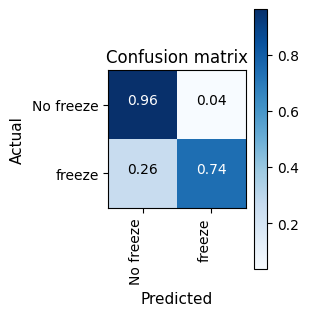

In [29]:
from models import MLPMixer, train
import torch
model = MLPMixer.MlpMixer(image_height=9, image_width=126,
                          patch_size=9, token_dim=256, channel_dim=512,
                          patch_dim=512, num_classes=2,
                          num_blocks=10)
model = model.cuda()


print(sum(p.numel() for p in model.parameters() if p.requires_grad))
path = "../saved/daphnet/daphnet_step3_window126_patch9_downsample2_lr0_01_WDe3_s42_checkpoint.bin"
arr = torch.load(path)
model.load_state_dict(arr)


from torch.utils.data import DataLoader, SequentialSampler

test_sampler = SequentialSampler(test)
testing_loader = DataLoader(dataset=test,
                            batch_size=64,
                            sampler=test_sampler,
                            num_workers=0,
                            drop_last=True,
                            pin_memory=True)

label, pred, prob = validate(testing_loader, model)
#
from sklearn.metrics import classification_report
print(classification_report(label, pred, target_names=id2label))

Testing... (loss=0.00005): 100%|| 471/471 [00:12<00:00, 38.35it/s]


Normalized confusion matrix
[[0.97948542 0.02051458]
 [0.86666667 0.13333333]]
Throughput:  2997.2124675885575 accuracy:  tensor(0.8709)  micro_f1:  0.870853237791932  macro_f1:  0.5696127129931836  weighted_f1:  0.8372281108119377


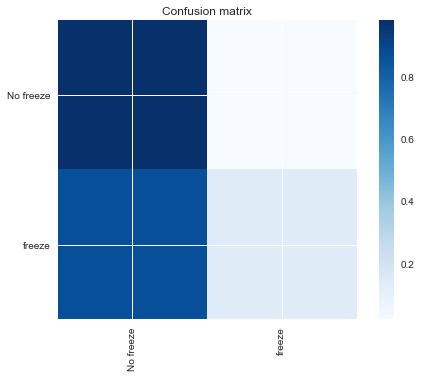

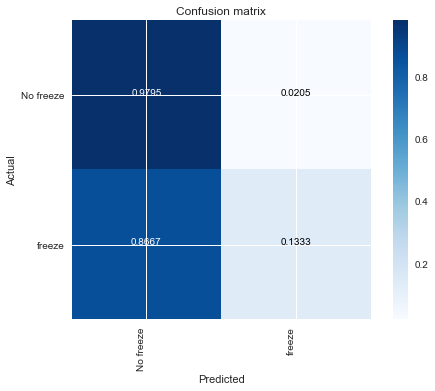

In [13]:
path = "../saved/daphnet/daphnet_step3_window99_patch9_downsample2_lr0_01_channeldim512_s42_checkpoint.bin"
from torch.utils.data import DataLoader, SequentialSampler

test_sampler = SequentialSampler(test)
testing_loader = DataLoader(dataset=test,
                            batch_size=64,
                            sampler=test_sampler,
                            num_workers=0,
                            drop_last=True,
                            pin_memory=True)

label, pred, prob = validate(testing_loader, model)

In [331]:
def softmax(a, axis=None):
    """
    Computes exp(a)/sumexp(a); relies on scipy logsumexp implementation.
    :param a: ndarray/tensor
    :param axis: axis to sum over; default (None) sums over everything
    """
    from scipy.special import logsumexp
    lse = logsumexp(a, axis=axis)  # this reduces along axis
    if axis is not None:
        lse = np.expand_dims(lse, axis)  # restore that axis for subtraction
    return np.exp(a - lse)

soft_prob = softmax(prob, 1)

[0.978 0.022]


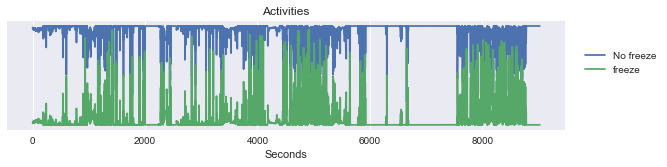

In [337]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("seaborn")

sprob_t = soft_prob.transpose()
#split = [data[i] for i in range(len(data))]
x = np.array(range(sprob_t.shape[1]))

fig = plt.figure(figsize=(10,2))
colors = sns.color_palette("RdBu", len(id2label))

for i in range(len(id2label)):
    plt.plot(x, sprob_t[i], label=id2label[i])

plt.legend(loc = "upper center", bbox_to_anchor=(1.1, 0.8), ncol=1)
plt.title('Activities')
plt.xlabel('Seconds')

plt.yticks([])

plt.show()


In [157]:
z = test.data['targets'][5900:6100]
print(z)
count = np.array(np.unique(z, return_counts=True))
print(count)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 1 1 1 1 1 1 1
 1 1 1 1 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 1
 1 1 1 2 2 2 2 2 2 2 2 2 2 2 1 1 1 2 2 2 2 2 2 2 1 1 1 3 3 3 3 3 3 3 3 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 3 3 3 3 3 1 1 1 2
 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[[ 0  1  2  3  4]
 [44 60 53 13 30]]


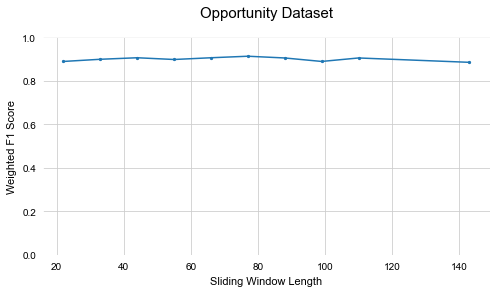

In [35]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#split = [data[i] for i in range(len(data))]
x = np.array([22, 33, 44, 55, 66, 77, 88, 99, 110, 143])
y = np.array([0.889, 0.899, 0.906, 0.898, 0.906, 0.913, 0.905, 0.889, 0.905, 0.885])
#x = np.linspace(0, (1/30 * len(test.data['targets'])), num=len(test.data['targets']), endpoint=True, retstep=False, dtype=None, axis=0)

fig, ax = plt.subplots(figsize=(8, 4))

ax.set_xlabel('Sliding Window Length', fontsize=11, labelpad=5)
ax.set_ylabel('Weighted F1 Score', fontsize=11, labelpad=5)
ax.set_title('Opportunity Dataset', fontsize=15, pad=20)

ax.title.set_color('black')
ax.xaxis.label.set_color('black')
ax.yaxis.label.set_color('black')
ax.tick_params(colors='black', which='both')

plt.plot(x, y)
plt.scatter(x, y, s=5)

plt.ylim([0, 1])

plt.show()

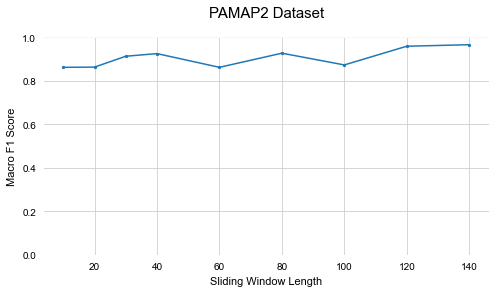

In [37]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#split = [data[i] for i in range(len(data))]
x = np.array([10, 20, 30, 40, 60, 80, 100, 120, 140])
y = np.array([0.862, 0.863, 0.913, 0.925, 0.862, 0.927, 0.873, 0.959, 0.966])
#x = np.linspace(0, (1/30 * len(test.data['targets'])), num=len(test.data['targets']), endpoint=True, retstep=False, dtype=None, axis=0)

fig, ax = plt.subplots(figsize=(8, 4))

ax.set_xlabel('Sliding Window Length', fontsize=11, labelpad=5)
ax.set_ylabel('Macro F1 Score', fontsize=11, labelpad=5)
ax.set_title('PAMAP2 Dataset', fontsize=15, pad=20)

ax.title.set_color('black')
ax.xaxis.label.set_color('black')
ax.yaxis.label.set_color('black')
ax.tick_params(colors='black', which='both')

plt.plot(x, y)
plt.scatter(x, y, s=5)

plt.ylim([0, 1])

plt.show()

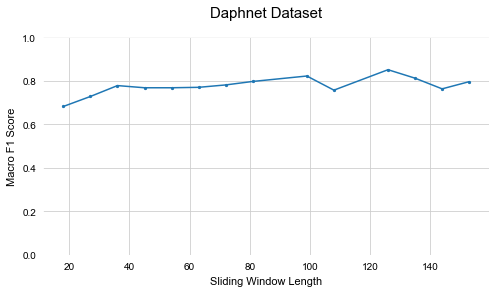

In [40]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#split = [data[i] for i in range(len(data))]
x = np.array([18, 27, 36, 45, 54, 63, 72, 81, 99, 108, 126, 135, 144, 153])
y = np.array([0.682, 0.728, 0.778, 0.768, 0.768, 0.77, 0.781, 0.797, 0.822, 0.757, 0.851, 0.812, 0.763, 0.796])
#x = np.linspace(0, (1/30 * len(test.data['targets'])), num=len(test.data['targets']), endpoint=True, retstep=False, dtype=None, axis=0)

fig, ax = plt.subplots(figsize=(8, 4))

ax.set_xlabel('Sliding Window Length', fontsize=11, labelpad=5)
ax.set_ylabel('Macro F1 Score', fontsize=11, labelpad=5)
ax.set_title('Daphnet Dataset', fontsize=15, pad=20)

ax.title.set_color('black')
ax.xaxis.label.set_color('black')
ax.yaxis.label.set_color('black')
ax.tick_params(colors='black', which='both')

plt.plot(x, y)
plt.scatter(x, y, s=5)

plt.ylim([0, 1])

plt.show()

In [121]:
#oppo
m = np.array([0.91662, 0.91258, 0.90877, 0.913, 0.913])
print(m.mean(), m.std())

#daphnet
m = np.array([0.85182, 0.84889, 0.84257, 0.83845, 0.82998])
print(m.mean(), m.std())

#PAMAP2
m = np.array([0.97030, 0.97238, 0.96949, 0.96803, 0.97186])
print(m.mean(), m.std())

0.9127940000000001 0.0024884340457404226
0.842342 0.007755352732145707
0.9704119999999999 0.0015815359622847812


In [4]:
from models import MLPMixer, train
import torch
model = MLPMixer.MlpMixer(image_height=9, image_width=126,
                          patch_size=9, token_dim=256, channel_dim=512,
                          patch_dim=512, num_classes=2,
                          num_blocks=5, NoToken=True,
                          NoChannel=False, NoRGB=False)
model = model.cuda()

for name, param in model.named_parameters():
    if param.requires_grad:
        print (name)

har_embedding.weight
har_embedding.bias
patch_embedding.weight
patch_embedding.bias
MixerBlock.0.pre_norm.weight
MixerBlock.0.pre_norm.bias
MixerBlock.0.post_norm.weight
MixerBlock.0.post_norm.bias
MixerBlock.0.channel_mixing.fc.weight
MixerBlock.0.channel_mixing.fc.bias
MixerBlock.0.channel_mixing.fc2.weight
MixerBlock.0.channel_mixing.fc2.bias
MixerBlock.1.pre_norm.weight
MixerBlock.1.pre_norm.bias
MixerBlock.1.post_norm.weight
MixerBlock.1.post_norm.bias
MixerBlock.1.channel_mixing.fc.weight
MixerBlock.1.channel_mixing.fc.bias
MixerBlock.1.channel_mixing.fc2.weight
MixerBlock.1.channel_mixing.fc2.bias
MixerBlock.2.pre_norm.weight
MixerBlock.2.pre_norm.bias
MixerBlock.2.post_norm.weight
MixerBlock.2.post_norm.bias
MixerBlock.2.channel_mixing.fc.weight
MixerBlock.2.channel_mixing.fc.bias
MixerBlock.2.channel_mixing.fc2.weight
MixerBlock.2.channel_mixing.fc2.bias
MixerBlock.3.pre_norm.weight
MixerBlock.3.pre_norm.bias
MixerBlock.3.post_norm.weight
MixerBlock.3.post_norm.bias
MixerBlock